# The Factors behind The Price of Housing in King County
     Wenkai Fu
     April 16th, 2022

# Introduction
As a university student who has not yet entered the workforce, it is necessary to understand what factors can influence the price of a house. It is due to the price of the house directly contributing to the level of stress we will face in life. So this analysis is designed to __help people choose a more cost-effective home while meeting their needs__. Thus, the research question of the analysis is that __what are some factors that greatly correlate with the price of housing__.

In this analysis, the main message will be analyzed into two parts, the first part(project 1) is to explore how the factors of the house greatly correlate with the price of housing **statistically**, while the second part(project 2) aims to develop the relationship between housing price and factors of the house **geographically**. For the third part of the project, we scrape the school information from the website and explores the relationship between the school and price both **statistically** and **graphically**. For the last part of the project, the dataset is analyzed from a quantitative perspective using **linear regression** and **machine learning**.

The dataset that supports the analysis in project 1 is *House Sales in King County, USA*, which is published by Harlfoxem in 2017. The dataset records the house sale prices and several house indicators for King County between May 2014 and May 2015. The outcome is **the price of the house**, which is a numerical variable, and the price is in US dollars. Furthermore, the explanatory variables are the **number of bedrooms**, **the number of bathrooms** and **the living area of the house**. The reason why I choose these indicators is that these indicators are the most basic and relevant to life. Moreover, controlling the number of important indicators and filtering unimportant variables can reduce the variance of the prediction. Note that these independent variables are all numerical. The 0.5 for the number of bathrooms means a room with a toilet but no shower. 

There are 4 datasets(3 external datasets) to help analyze the relationship between factors and the price of houses geographically in project 2. They are *House Sales in King County, USA*, *US Counties shapefile*, *King County subdivisions shapefile* and *Zipcode shapefile in King County*. Except for the data set analyzed in project 1, the rest three datasets contain shape information under different geographical levels (counties, county subdivisions and Zipcode separately). Furthermore, for the *House Sale in King County* dataset, in addition to the variables selected in project 1, I added the **latitude and longitude** of each house for analysis. Latitude and longitude are continuous numerical variables.

For project 3, the school information in King County will be supplemented to analyze the research question. Unlike the previous two projects, the different point is that the school information will be extracted by web scraping instead of finding the existing dataset. By doing this, two scarping methods will be introduced, `HTML` and `API` Based Scraping. And the school information is all comes from **Wikipedia webpage**. After scraping, the scraped dataset will be merged with the original dataset and will be described **statistically and geographically**. The reason for choosing school information is the school may have an impact on the price of the surrounding houses. This is because in the eyes of some consumers, having a school around a house is a huge boost to their __utilities__.

For the final project, variables from the dataset will be analyzed from a quantitative perspective by using the linear regression model and machine learning. This result will be used to answer the research question.

By referring to Bernardina Algieri's House Price Determinants: Fundamentals and Underlying Factors analysis, this analysis adds the impact of location, including school district information, on the price of a house. The difference between the two analyis is that Bernardina Algieri's analysis includes the effect of stocks, inflation rate and interest rate on housing prices.

Last but not the least, I hypothesize that the __living area__ of the house has a strong positive relationship with the __price__ of the house statistically and geographically. And the __number of school__ around the house has a strong positive relationship with the __price__.

<div style="page-break-after: always;"></div>

# Project 1

In [5]:
# Import packages
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [101]:
# Import data
df = pd.read_csv(r'/Users/fuwenkai/Documents/U of T/ECO225/ECO225 Project/Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Summary Statistics
### Data Cleaning
After importing the dataset from the Kaggle website, it is important to clean the dataset. Since the response variable and the explanatory variables are already selected previously. It is helpful to clean the dataset by selecting the practical variables from the raw dataset. After that, removing invalid observations is also critical. It makes the analysis more precise and reliable. According to common sense, the number of bedrooms, bathrooms and the living area should not be 0. Therefore, we need to remove these unconventional observations.

In [102]:
# Cleaning process
useful_col = ['price',
             'bedrooms',
             'bathrooms',
             'sqft_living']
df_clean = df[useful_col] # Select useful columns

df_clean = df_clean.drop(df_clean[df_clean.bedrooms == 0].index)
df_clean = df_clean.drop(df_clean[df_clean.bathrooms == 0].index)

df_clean = df_clean.dropna().reset_index()
df_clean.head()

,index,price,bedrooms,bathrooms,sqft_living
0,0,221900.0,3,1.00,1180
1,1,538000.0,3,2.25,2570
2,2,180000.0,2,1.00,770
3,3,604000.0,4,3.00,1960
4,4,510000.0,3,2.00,1680


The table above shows the cleaned dataset after the cleaning processes that are presented previously. The cleaned dataset has four variables, one response variable(Price) and three explanatory variables(The number of bedrooms, bathrooms and the living area). Besides, compared with the raw dataset that owns 21613 observations, the cleaned dataset now contains 21597 observations, 16 invalid observations are removed.

### Statistics Summary

In [8]:
# Summary statistics for the outcome(Y)
df_clean["price"].describe()

count    2.159700e+04
mean     5.402029e+05
std      3.671337e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

For housing prices, the statistical summary is described above. As you can see, the difference between prices is significant, with the most expensive prices of $7.7*10^6$, which is more than 14 times the average housing price. The standard deviation of prices is about $3.67 * 10^5$, which is large and means that the distribution of housing prices is very dispersed.

In [9]:
# Summary statistics for the explantory variables(X)
df_clean[["bedrooms", "bathrooms", "sqft_living"]].describe()

,bedrooms,bathrooms,sqft_living
count,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850
std,0.926299,0.768984,918.106125
min,1.000000,0.500000,370.000000
25%,3.000000,1.750000,1430.000000
50%,3.000000,2.250000,1910.000000
75%,4.000000,2.500000,2550.000000
max,33.000000,8.000000,13540.000000


This table contains the statistics of three explanatory variables. On average, the number of bedrooms of houses is about 3.37, the number of bathrooms is 2.12 approximately, and the living area of houses is about 2080.32 sqft. What can be observed is that the differences between the data are very large and include outliers. For instance, the maximum value of the number of bedrooms is 33, which is nearly ten times the average. Furthermore, the distribution of the number of bedrooms witnesses a right-skewed pattern since the median(50% quantile = 3) is less than the mean(3.37) value. Similarly, the distribution of living area has a right-skewed patten as well, because the median(1910 sqft) is less than the mean value(2080.32 sqft). Conversely, the median(2.25) of the number of bathrooms is similar to the mean(2.12), so the distribution is likely to be symmetric.

In [10]:
df_clean.dtypes

index            int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

By looking at the type of variables, we can determine a suitable graphical summary of the corresponding variable. For float(continuous numerical variable), the histogram is very useful. For integer(discrete numerical variable), the boxplot can be practical.

### Graphical Summary

In [11]:
# Remove the outlier for the housing price
iqr = 645000 - 322000
out_range = [322000-(1.5*iqr), 645000 + (1.5*iqr)]

prices = []
for y in df_clean["price"]:
    if y <= out_range[1]:
        prices.append(y)
        
prices

# Create a new dataframe that contains price information without outlier
p_wit = pd.DataFrame(prices, columns = ['price'])
p_wit.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


To graph the price of the house, clearing the outlier is very important, and here I use the 1.5 IQR range rule to define the outlier. The table above shows the housing prices in King County after removing the outlier.

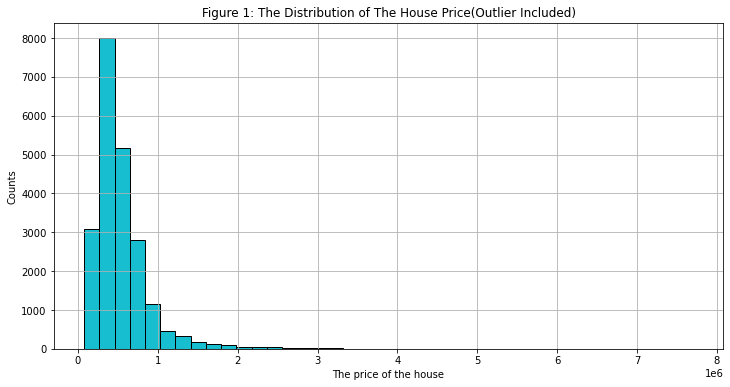

In [12]:
# Plot the histogram of the outcome Y, the price of the house.
bgcolor = (250/255, 250/255, 250/255)
p_hist = df_clean.hist(column = "price",
              grid = True,
              figsize = (12, 6), 
              bins = 40,
              orientation = "vertical",
              color = "tab:cyan",
             ec = "black");
plt.title('Figure 1: The Distribution of The House Price(Outlier Included)')
plt.xlabel('The price of the house')
plt.ylabel('Counts');

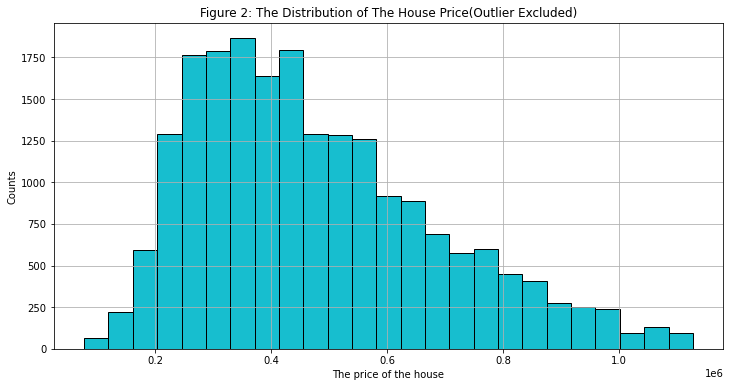

In [13]:
# Plot the histogram of the outcome without outlier
p_hist1 = p_wit.hist(column = 'price',
                    grid = True,
                    figsize = (12, 6),
                    bins = 25,
                    orientation = "vertical",
                    color = "tab:cyan",
                    ec = "black");
plt.title('Figure 2: The Distribution of The House Price(Outlier Excluded)')
plt.xlabel('The price of the house')
plt.ylabel('Counts')
plt.rcParams['axes.facecolor'] = bgcolor;

Figures 1 and 2 show the distribution of the house price. By comparing these two graphs, it is clear that Figure 2 shows the distribution of housing prices more clearly. This also shows that outlier has a very big impact on the data. The house price is the outcome of the analysis. The histogram follows a right-skewed pattern, which validates our analysis in the statistics summary. And it is a unimodal distribution with a center of 400000 approximately. Moreover, most house prices are located between 200000 and 800000 US dollars.

In [14]:
# Clean the outlier for bedrooms
new_i = 0
for i in range (0, df_clean['bedrooms'].count()):
    if df_clean['index'][i] == 15870:
        new_i = i
df_clean.drop(new_i, axis = 0, inplace = True)

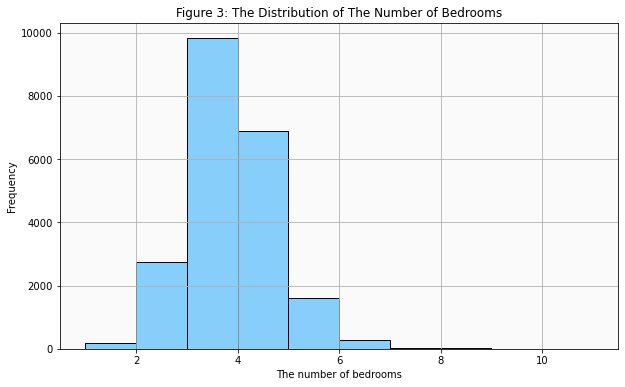

In [15]:
# Plot the histogram of the first X, the number of bedrooms of the house.
fig, ax = plt.subplots(figsize = (10,6))
bgcolor = (250/255, 250/255, 250/255)
df_clean.plot(
    kind="hist", 
    y="bedrooms", 
    color= "lightskyblue",
    legend=False, 
    ec = "black",
    grid = True,
    ax=ax
)
ax.set_title("Figure 3: The Distribution of The Number of Bedrooms")
ax.set_xlabel("The number of bedrooms")
ax.set_facecolor(bgcolor)

Figure 3 describes the distribution of the number of bedrooms of houses in King County. The histogram follows a slight right-skewed pattern. Moreover, most house owns several bedrooms between 3 and 5. Note that the minimum number of bedrooms is 1, and the maximum value has been removed as an outlier.

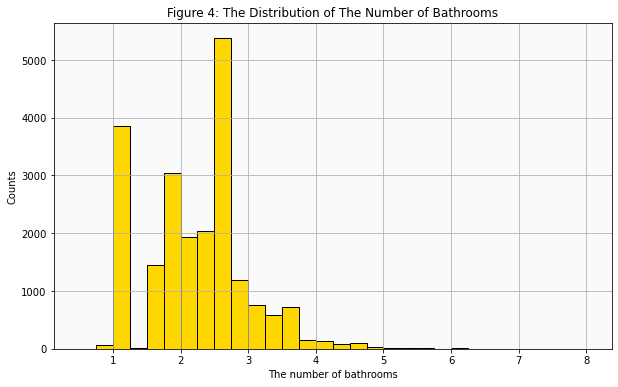

In [16]:
# Plot the histogram of the second X, the number of bathrooms of the house.
bat_hist = df_clean.hist(column='bathrooms',
        grid=True,
        figsize=(10, 6),
        bins=30,
        orientation='vertical',
        color='gold',
        ec = "black");
plt.title("Figure 4: The Distribution of The Number of Bathrooms")
plt.xlabel("The number of bathrooms")
plt.rcParams['axes.facecolor'] = bgcolor
plt.ylabel("Counts");

Figure 4 above shows the distribution of the number of house bathrooms. The histogram is approximately symmetrical with a center of about 2.5. It is a bimodal distribution where the peaks are 1.25 and 2.75 separately. Plus, the most number of bathrooms in the house is under 3.

In [17]:
# Remove the outlier for living area
ind = []
new_i = 0
for i, value in zip(range(0, df_clean['sqft_living'].count()), df_clean['sqft_living']):
    #print(i, value)
    if value > 8000:
        ind.append(i)
ind
df_clean2 = df_clean.drop(ind, axis = 0)

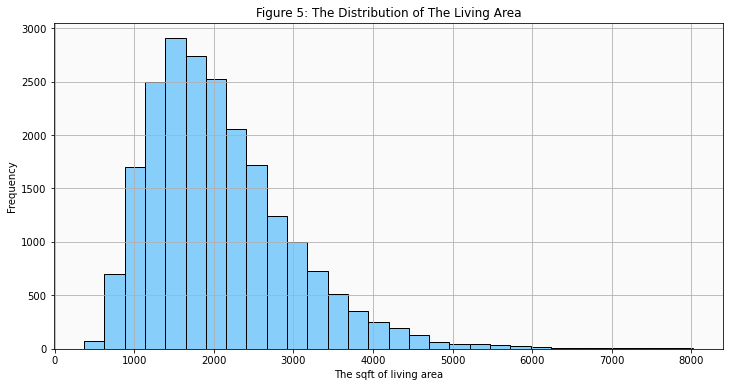

In [18]:
# Plot the histogram of the first X, the number of bedrooms of the house.
fig, ax = plt.subplots(figsize = (12,6))
bgcolor = (250/255, 250/255, 250/255)
df_clean2.plot(
    kind="hist", 
    y="sqft_living", 
    color= "lightskyblue",
    bins = 30,
    legend=False, 
    ec = "black",
    grid = True,
    ax=ax
)
ax.set_title("Figure 5: The Distribution of The Living Area")
ax.set_xlabel("The sqft of living area")
ax.set_facecolor(bgcolor)

Figure 5 shows how the living area of the house is distributed. The reason we don't use __1.5*IQR outlier range__ is that the living area of the house is assigned by tier, if we remove those observations above the range, we will miss a lot of information. The living area has a right-skewed and unimodal pattern, which means the mean value will be larger than the median. And the most living area of houses is between 1000 and 3000 sqft in King County.

## Part 2

In this part, the basic information regarding the independent and dependent(housing price) variables such as distribution will be displayed. The **main message** of this part is to **explore the factors of the house that greatly correlate with the price of housing statistically**.

In [19]:
%%capture
# Clean the outliers for both bedrooms and prices
warnings.filterwarnings('ignore')
df_clean1 = df_clean.drop(df_clean[df_clean.price > out_range[1]].index)
df_clean1 = df_clean1.reset_index().drop(['level_0','index'], 1)
df_clean1.head()

Now we study the distribution of both prices(outcome) and the number of bedrooms(independent variable). Since the number of bedrooms is a discrete numerical variable. It is worth analyzing to plot the outcome by subgroups. The table above contains the dataset after removing the outlier.

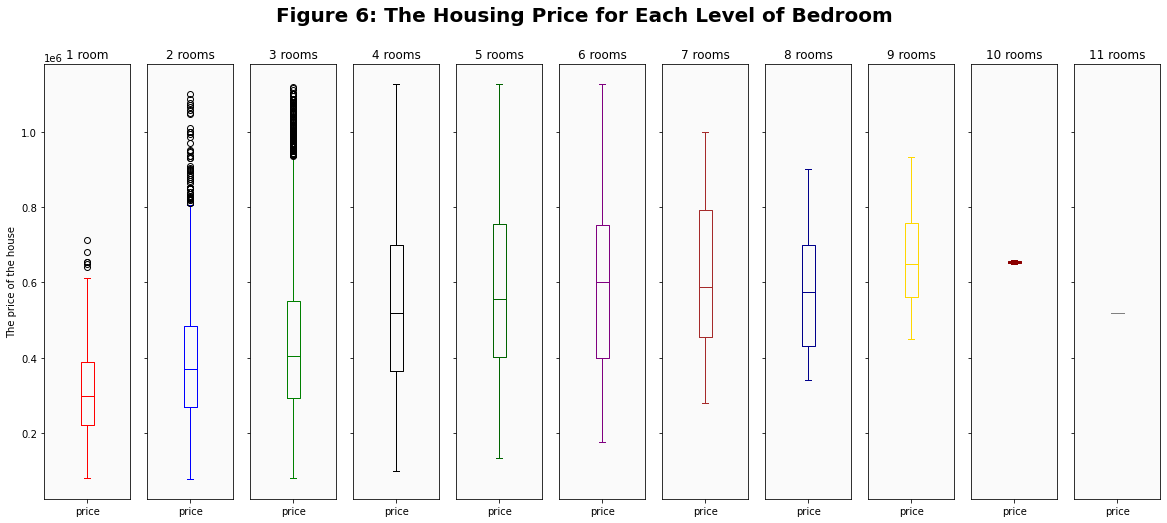

In [20]:
# Plot Y by subgroups (bedrooms)
def single_boxplot(df, num, ax, color):
    """
    This function create a boxplot of the number of bedroom at a specific level,
    
    """
    # Filter data to keep only the data of interest
    _df = df.query("(bedrooms == @num)")
    _df.plot(
        kind="box", y="price", ax=ax, color=color
    )

    return ax

# Create initial plot
number = [i for i in range(1,12)]
fig, ax = plt.subplots(1,11,figsize=(20, 8), sharey=True)

colors = ['r', 'b', 'g', 'black', 'darkgreen', 'purple',
          'brown','darkblue', 'gold', 'darkred', 'gray']

for (i, num) in enumerate(number):
    if i == 0:
        single_boxplot(df_clean1, num, ax[i], colors[i])
        ax[i].set_title(str(num)+' room')
        ax[i].set_ylabel("The price of the house")
    else:
        single_boxplot(df_clean1, num, ax[i], colors[i])
        ax[i].set_title(str(num)+' rooms')
        ax[i].set_ylabel("The price of the house")

plt.suptitle("Figure 6: The Housing Price for Each Level of Bedroom", 
             fontweight = "bold",
             fontsize = 20);

Figure 6 illustrates the housing price under a different number of bedrooms by using boxplots. The y-axis is the price of the house while the x-axis explains the housing price under different levels of bedrooms. Eleven distinctive colours are used to distinguish the boxplots. It is clear to observe that the average value of housing prices rises with the number of rooms, except for the number of 10 rooms and 11 rooms. This is due to the small size of ten and eleven room numbers. Moreover, the lower limit of housing is getting higher since the 25% quantile is higher. Furthermore, as the number of rooms increases, the prices become more concentrated, which means that the variance of housing prices decreases. Therefore, based on these boxplots and our **main message** for this section, the housing price is positively related to the number of bedrooms.

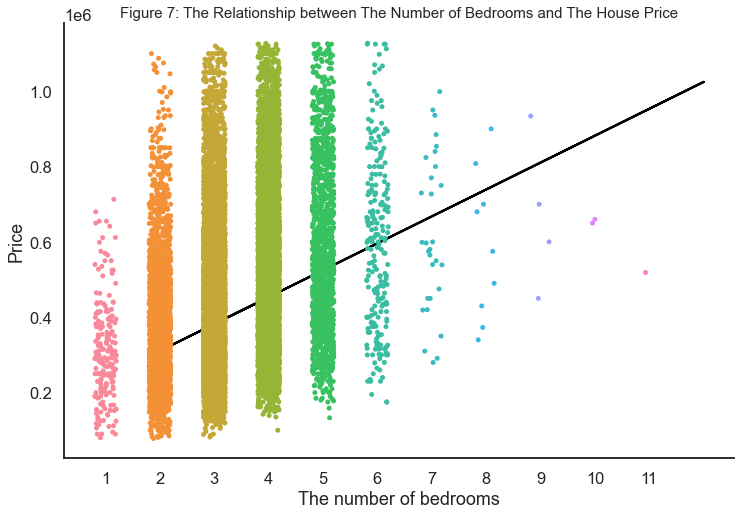

In [21]:
warnings.filterwarnings('ignore')
# Plot the jitter plot for the bedrooms and prices
plt.figure(figsize=(12, 8));
x = df_clean1['bedrooms']
y = df_clean1['price']
sns.set(style='white', context='talk')

sns.stripplot(x, 
              y, 
              data=df_clean1,
              jitter=0.2)
sns.despine()

# Add regression line
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b, color = "black")
plt.title('Figure 7: The Relationship between The Number of Bedrooms and The House Price',
         fontsize = 15)
plt.xlabel('The number of bedrooms')
plt.ylabel('Price');

Figure 7 is a scatter plot with a jitter method that represents the relationship between the number of bedrooms(x-axis) and the house price(y-axis) in King County. Common sense dictates that the bedroom should be the place in a house where people spend the most time, so it is important to understand the number of bedrooms concerning the price of the house, which can help consumers cost-effectively maximize their utility. The brown dots represent the housing price and their corresponding number of bedrooms. 

The black line is the regression line that is generated by the dataset. It is easy to observe that there is a moderate positive relationship between house price and the number of bedrooms since the slope of the regression line is not steep. Moreover, we can observe that the density of housing price for the corresponding number of bedrooms decreases as the price or the number of bedrooms increases. Eleven different colours are used to distinguish a different number of bedrooms.

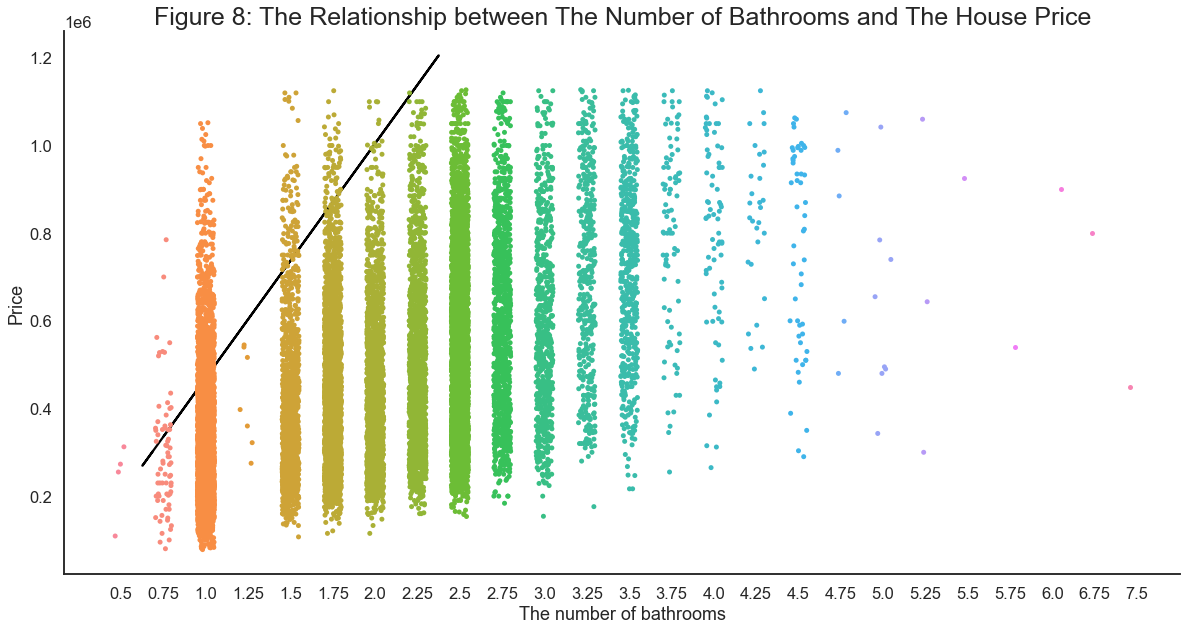

In [22]:
warnings.filterwarnings('ignore')
# Plot the jitter plot for bathrooms and prices
plt.figure(figsize=(20, 10));
x = df_clean1.bathrooms
y = df_clean1.price
sns.set(style='white', context='talk')

sns.stripplot(x, 
              y, 
              data=df_clean1,
              jitter=0.2)
sns.despine()

# Add regression line
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b, color = "black")
plt.title('Figure 8: The Relationship between The Number of Bathrooms and The House Price',
         fontsize = 25)
plt.xlabel('The number of bathrooms')
plt.ylabel('Price')
plt.show();

Similarly, figure 8 illustrates the relationship between the housing price and the number of bathrooms. Bathrooms are also an essential part of the house, so studying the relationship between the number of bathrooms and the price of the house is also essential to help consumers meet their utility maximization bundle of price and quantity. The green dots represent the price of the house corresponding to the number of bathrooms. What can be observed is that the slope of this regression line is a little steeper than the slope of the line in Figure 5. Therefore, compared with the number of bedrooms, the number of bathrooms has a stronger positive correlation with the housing price. 

Plus, It can be seen that the density of the scatter plot is the lowest when the number of bathrooms is 0.5, 1.25 and greater than 5 bathrooms, which means that the house sells very little at these numbers of bathrooms. As usual, different colours are used to distinguish the different number of bathrooms in the plot.

<Figure size 576x720 with 0 Axes>

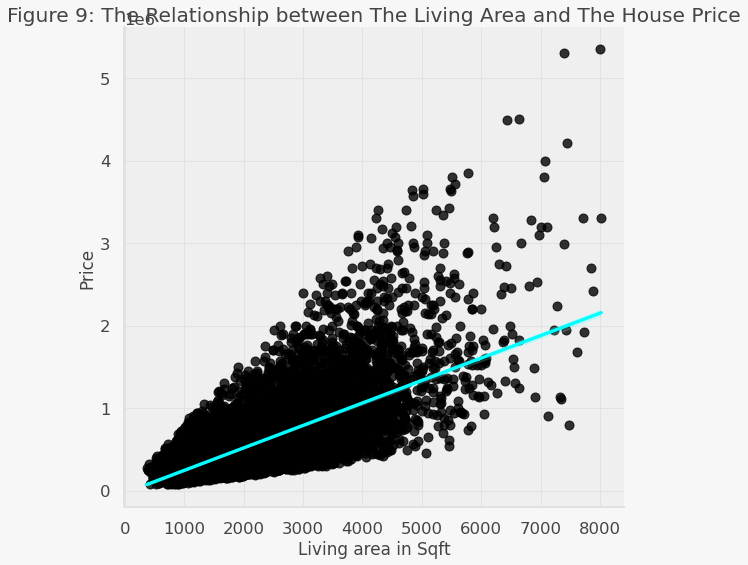

In [87]:
# Plot the relationship between the living area and the price of house.
plt.figure(figsize=(8, 10))
rel_x3 = sns.lmplot(x = 'sqft_living',
           y = 'price',
           data = df_clean2,
           scatter = True,
           fit_reg = True,
           line_kws = {'color': 'aqua'},
           scatter_kws = {'color': 'black'},
           height = 8);

plt.title('Figure 9: \
The Relationship between The Living Area and The House Price')
plt.xlabel('Living area in Sqft');
plt.ylabel('Price');

Lastly, Figure 9 demonstrates how the living area and housing price are related. These two variables are the hypotheses in this piece. This should be the most intuitive relationship, the price of the house will be closely related to the area. From the diagram, the black dot represents the price of the house corresponding to the living area. And the blue regression line tells that there is a strong positive correlation between the living area and the housing price. Furthermore, it is easy to see that this scatterplot has a fan-out pattern. Compared with the previous two independent variables, the correlation of the living area with the price is significantly higher.

## Project 2

## Dataset Preparation

In [24]:
# Import packages
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

### Import External Datasets

In [25]:
%%capture
# US counties files and select useful information
US = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip")
US = US[['STATEFP', 'COUNTYFP', 'NAME', 'INTPTLAT', 'INTPTLON', 'geometry']]
US.head()

The dataset above records the information of each state in the USA. It includes the FIPS for each county, as well as various geographical location information such as latitude and longitude corresponding to it. The most important thing is that it includes the shape information of counties in the USA, which is very helpful for us to map the house sale in King County, DC. The dataset comes from the US census website.

In [26]:
%%capture
### US counties subdivision files, and filter the useful county subdivisions
county_sub = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2018/COUSUB/tl_2018_53_cousub.zip")
county_sub = county_sub.drop(county_sub[county_sub.COUNTYFP != '033'].index)
county_sub = county_sub[['STATEFP', 'COUNTYFP', 'NAME', 'INTPTLAT', 'INTPTLON', 'geometry']]
county_sub.head()

This dataset illustrates the county subdivisions information of each county. After cleaning and filtering, the dataset contains eight county subdivisions attached with their position and shape information in King County. In discussing geographic location, I will rely primarily on county subdivisions. Similarly, the dataset comes from the US census website.

In [27]:
### US zipcode file
king_zip = gpd.read_file('https://www2.census.gov/geo/tiger/TIGER2019/ZCTA5/tl_2019_us_zcta510.zip')

In [28]:
# Define all zipcodes in the King County.
KC_zip = [98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,
                 98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,
                 98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,
                 98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,
                 98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,
                 98251,98134,98039,98195,98158,98068,98256,98288,98050,98009,98013,98015,98025,98035,98041,98054,
                 98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98132,
                 98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98171,98175,98181,98185,
                 98184,98190,98194,98191,98224,98471,98481]
KC_str_zip = []
for z in KC_zip:
    KC_str_zip.append(str(z))

In [29]:
#%%capture
warnings.filterwarnings('ignore')
# select useful information
king_zip
king_zip1 = king_zip[king_zip['ZCTA5CE10'].isin(KC_str_zip)] # Select zipcode shapefile for King County
king_zip1 = king_zip1[['ZCTA5CE10', 'geometry']] # Select the useful
king_zip1 = king_zip1.reset_index().drop('index', 1)
king_zip1

,ZCTA5CE10,geometry
0,98354,"POLYGON ((-122.33656 47.24504, -122.33628 47.2..."
1,98014,"POLYGON ((-122.00562 47.70899, -122.00439 47.7..."
2,98019,"POLYGON ((-122.02800 47.73249, -122.02780 47.7..."
3,98022,"POLYGON ((-122.11589 47.21625, -122.11580 47.2..."
4,98023,"MULTIPOLYGON (((-122.34200 47.32465, -122.3419..."
...,...,...
84,98006,"POLYGON ((-122.20193 47.54667, -122.20162 47.5..."
85,98007,"POLYGON ((-122.15494 47.58463, -122.15468 47.5..."
86,98008,"POLYGON ((-122.13759 47.57975, -122.13757 47.5..."
87,98010,"POLYGON ((-122.05445 47.31796, -122.05425 47.3..."


The Zipcode dataset above explains the zipcode and their corresponding shape information in King County. As it can tell, there are 89 distinct regions after screening the dataset. In the process of drawing the map, we will merge this dataset with our house sale dataset based on Zipcode in King County. This dataset comes from US Census website as well.

### Update Our Own Dataset

In [30]:
# Create coordinate for house location in the dataset
df["Coordinates"] = list(zip(df.long, df.lat))
df["Coordinates"] = df["Coordinates"].apply(Point)
useful_col = ['price',
             'bedrooms',
             'bathrooms',
             'sqft_living',
             'zipcode', 
             'lat','long','Coordinates']
df = df[useful_col]
df.head().style.set_caption('House Sale in King County').set_table_styles([{
    'selector': 'caption','props': [('color', 'black'),
        ('font-size', '16px')]}])

,price,bedrooms,bathrooms,sqft_living,zipcode,lat,long,Coordinates
0,221900.000000,3,1.000000,1180,98178,47.511200,-122.257000,POINT (-122.257 47.5112)
1,538000.000000,3,2.250000,2570,98125,47.721000,-122.319000,POINT (-122.319 47.721)
2,180000.000000,2,1.000000,770,98028,47.737900,-122.233000,POINT (-122.233 47.7379)
3,604000.000000,4,3.000000,1960,98136,47.520800,-122.393000,POINT (-122.393 47.5208)
4,510000.000000,3,2.000000,1680,98074,47.616800,-122.045000,POINT (-122.045 47.6168)


In the analysis of project 1, our dataset contains only one dependent variable and the three independent variables that are most closely associated with the dependent variable. To reach our main message for this section, we now need to add some geolocation information, specifically, we add the Zipcode of the house and the latitude and longitude. Moreover, the coordinate of houses is also created for use when drawing maps.

### Merging Datasets

In [31]:
%%capture
# Merge the zip shapefile and my dataset(housing sale dataset)

# Unify the type of zip code
z = list(king_zip1['ZCTA5CE10'])
for i in range(len(z)):
    z[i] = float(z[i])
king_zip1['ZCTA5CE10'] = z

# Group the dataset by zipcode and calculate the mean value of price in each districts
gbz = df.groupby("zipcode")
mean_gbz = gbz.mean()
mean_gbz

# Merge data by zipcode
housesale = mean_gbz.merge(king_zip1, left_on = 'zipcode', right_on = 'ZCTA5CE10', how = 'inner')
housesale.head()

The "house sale" dataset above is a merged dataset based on the **House Sale dataset in King County** and the **Zipcode shapefile in King County**. Firstly, I group the House Sale dataset by zipcode and calculate the mean value for the dependent variable and independent variables using GroupBy methods. After that, I merge these two datasets by common Zipcode. There are 70 different Zipcodes in the new House Sale dataset, which means there is some data missing because of the bias between the zipcode of the two datasets. The map in the next section is mainly based on this dataset, and the geographic level is Zip code.

## Map Summary

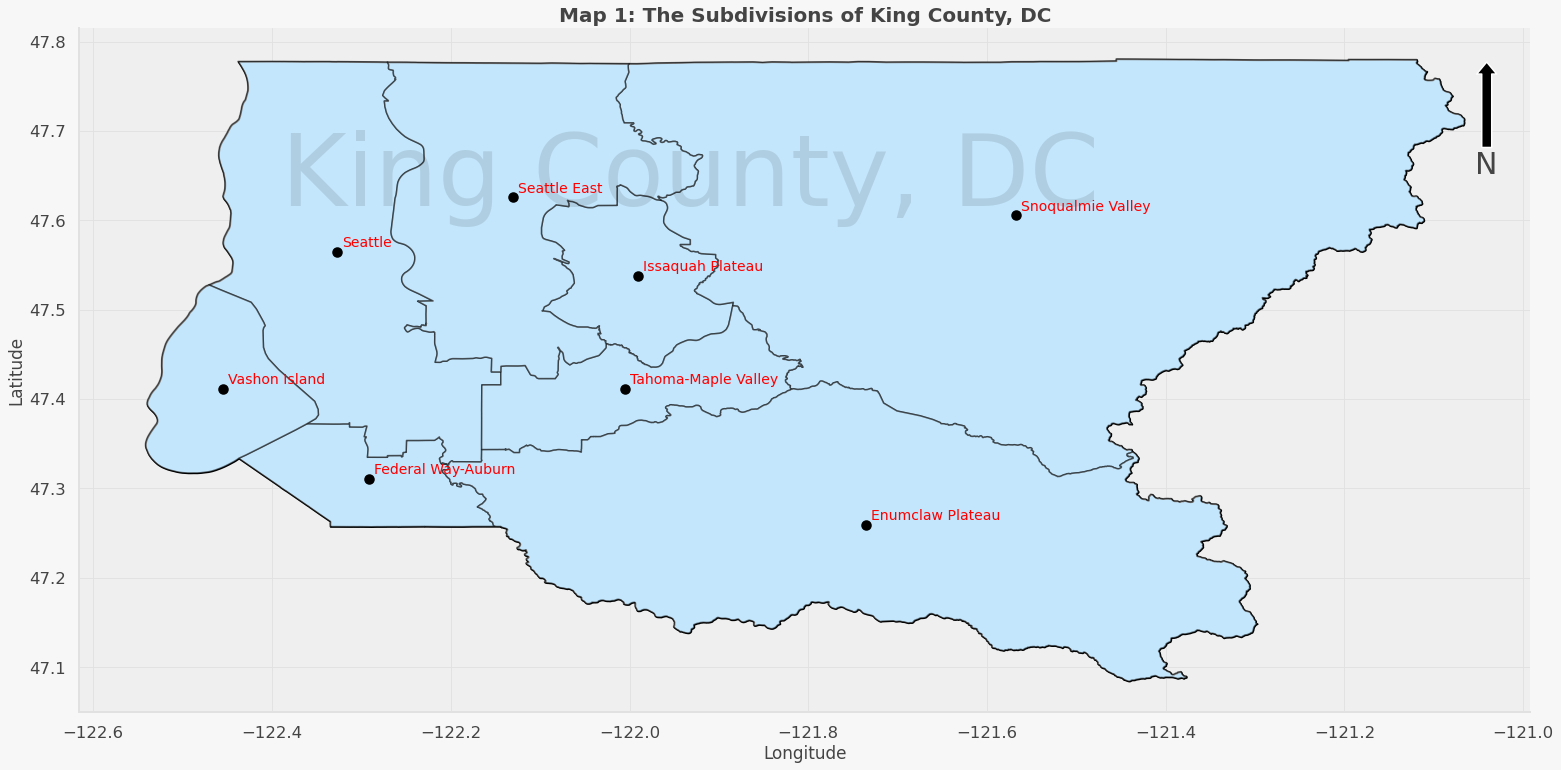

In [32]:
# Get the map
fig, gax = plt.subplots(figsize = (26,14))
US.query("COUNTYFP == '033' & NAME == 'King'").plot(ax = gax, 
                                                    edgecolor = "black", 
                                                    color = "lightskyblue",
                                                    alpha = 1);

# Graph the county subdivisions
county_sub.plot(ax = gax,
                edgecolor = "black",
                color = 'white',
                alpha = 0.5)

# Annotate the name of the county
gax.annotate('King County, DC', 
             xy=(0.15, 0.56), 
             xycoords='figure fraction', 
             color = "black", 
             alpha = 0.1,
             size = 100)

# Plot central point of county subdivisions
lat_l = list(county_sub.INTPTLAT)
for i in range(len(lat_l)):
    lat_l[i] = float(lat_l[i])

lon_l = list(county_sub.INTPTLON)
for i in range(len(lon_l)):
    lon_l[i] = float(lon_l[i])

county_sub["Coordinates"] = list(zip(lon_l, lat_l))
county_sub["Coordinates"] = county_sub["Coordinates"].apply(Point)
gcou_sub = gpd.GeoDataFrame(county_sub, geometry = 'Coordinates')
gcou_sub.plot(ax = gax, color = "black", alpha = 1)

# Add names to subdivisions
for x, y, label in zip(gcou_sub['Coordinates'].x, gcou_sub['Coordinates'].y, gcou_sub['NAME']):
    gax.annotate(label, 
                 xy = (x,y), 
                 xytext = (5,5), 
                 textcoords = 'offset points',
                 color = 'red')

# Add compass
gax.annotate('N', xy=(0.97, 0.95), xytext=(0.97, 0.80), xycoords=gax.transAxes,
            arrowprops=dict(facecolor='black', width=10, headwidth=20),
            ha='center', va='center', fontsize=30)

gax.set_xlabel("Longitude")
gax.set_ylabel("Latitude")
gax.set_title("Map 1: The Subdivisions of King County, DC", size = 20, fontweight = "bold");

Map 1 above explains the geolocation and shape of King County and eight county subdivisions. The central location and the name of each county subdivision are clearly labelled on the map. From the map, we can observe that the Snoqualmie Valley and Enumclaw Plateau share the largest part of King County. Moreover, Vashon Island, Federal Way-Auburn and Issaquah Plateau account for the smallest area of the county. And the area of the remaining three is similar to each other. __Note that the county zoning is only used to distinguish between home sales in each area, not the geographic level of the map__.

In this part, geographical information regarding the dataset will be provided. The **main message** of this part is to find out **how the independent factors correlate with the housing price from the geographical location**. That is the impact of the geographical location factor on the price of housing and useful independent variables(As analyzed in project 1).

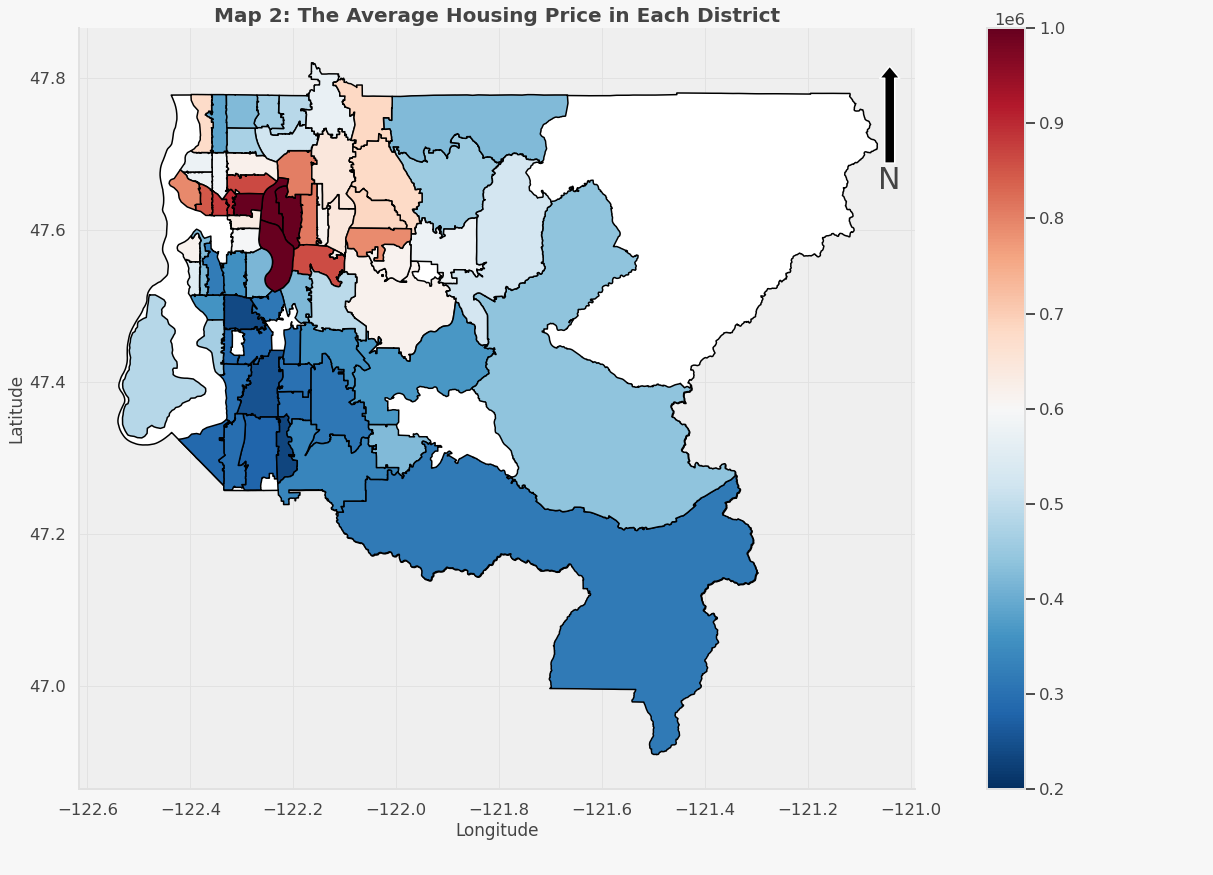

In [93]:
# The map regarding to dependent variable housing price
fig, gax = plt.subplots(figsize = (26,14))
US.query("COUNTYFP == '033' & NAME == 'King'").plot(ax = gax, 
                                                    edgecolor = "black", 
                                                    color = "white",
                                                    alpha = 1)

# Plot the zipcode districts
housesale = gpd.GeoDataFrame(housesale, geometry = 'geometry')
housesale.plot(ax = gax, edgecolor='black', column='price', legend=True, cmap='RdBu_r',
               vmin=200000, vmax=1000000)



# Add compass
gax.annotate('N', xy=(0.97, 0.95), xytext=(0.97, 0.80), xycoords=gax.transAxes,
            arrowprops=dict(facecolor='black', width=10, headwidth=20),
            ha='center', va='center', fontsize=30)

# Add description of legends
gax.annotate('The Housing Price Range', 
             xy=(0.8, 0.05), 
             xycoords='figure fraction', 
             color = "black", 
             alpha = 0.6,
             size = 15)

gax.set_xlabel("Longitude")
gax.set_ylabel("Latitude")
gax.set_title("Map 2: The Average Housing Price in Each District", 
              size = 20, fontweight = "bold");

Map 2 is a heat map and reflects the average housing price(Dependent Variable) in each district by Zipcode. The price of houses ranges from 200,000 to 1,000,000 US dollars. If the price is closer to 1,000,000, then the area is redder and closer to 200,000 is bluer. From the heat plot, areas located in the northwest part of the county will have higher prices than other locations. Looking back at map 1, we can easily see that these high housing prices are located in **Seattle**, **Seattle East** and **Issaquah Plateau**. Besides, areas located in the south of King County have relatively lower prices than the north. Similarly, from map 1, houses in **Vashon Island**, **Federal Way-Auburn** and **Enumclaw Plateau** have a relatively low price. 

In the following section, I will develop the relationship between Xs and Y by analyzing the **number of bedrooms** and the **living area** in the same region. These two independent variables are chosen because one is a discrete variable and the other is a continuous variable. Also, I believe that bedrooms are the most important part of a house, and the price of a house should be most closely related to the size of a room. Plus, the living area variable is in our hypothesis.

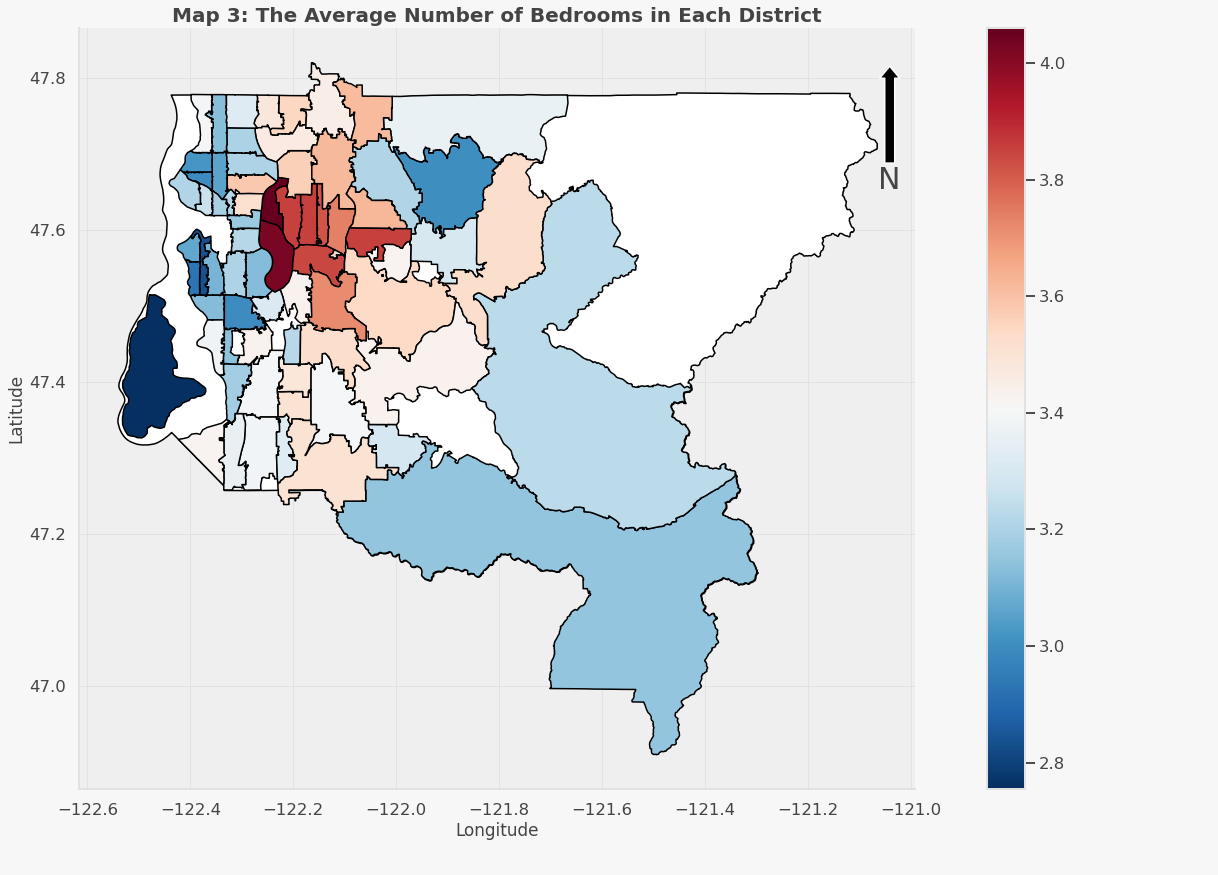

In [89]:
# The map regarding to the first independent variable the number of bedrooms
fig, gax = plt.subplots(figsize = (26,14))
US.query("COUNTYFP == '033' & NAME == 'King'").plot(ax = gax, 
                                                    edgecolor = "black", 
                                                    color = "white",
                                                    alpha = 1)

# Plot the zipcode districts
housesale = gpd.GeoDataFrame(housesale, geometry = 'geometry')
housesale.plot(ax = gax, edgecolor='black', column='bedrooms', 
               legend=True, cmap='RdBu_r',
               vmin=housesale['bedrooms'].min(), vmax=housesale['bedrooms'].max())

# Add compass
gax.annotate('N', xy=(0.97, 0.95), xytext=(0.97, 0.80), xycoords=gax.transAxes,
            arrowprops=dict(facecolor='black', width=10, headwidth=20),
            ha='center', va='center', fontsize=30)

# Add description of legends
gax.annotate('The Number of Bedrooms', 
             xy=(0.8, 0.05), 
             xycoords='figure fraction', 
             color = "black", 
             alpha = 0.6,
             size = 15)

gax.set_xlabel("Longitude")
gax.set_ylabel("Latitude")
gax.set_title("Map 3: The Average Number of Bedrooms in Each District",
              size = 20, fontweight = "bold");

Map 3 describes the average number of bedrooms(The first independent variable) in each region by Zipcode. Similarly, map 3 is a heat map and has the same colour pattern as map 2. The average number of bedrooms ranges from 2.75 to 4 approximately. The house in the northwest regions of the map has more bedrooms. Specifically, houses in **Seattle**, **Seattle East**, **Issaquah Plateau** and **Tahoma-Maple Valley** contain relatively more bedrooms. However, the average number of bedrooms in **Vashon Island** is extremely low about 2.8. By comparing map 2 and map 3, which is the **dependent variable(housing price)** map and the **first independent variable(the number of bedrooms)** map, there are similar findings in project 1. The average housing price is relatively high in Seattle, Seattle East and Issaquah Plateau, and the number of bedrooms is more in Seattle, Seattle East, Issaquah Plateau and Tahoma-Maple Valley. In Seattle, Seattle East and Issaquah Plateau, the number of bedrooms and the price of the houses are very high, which demonstrates a **positive association** between bedrooms and houses.

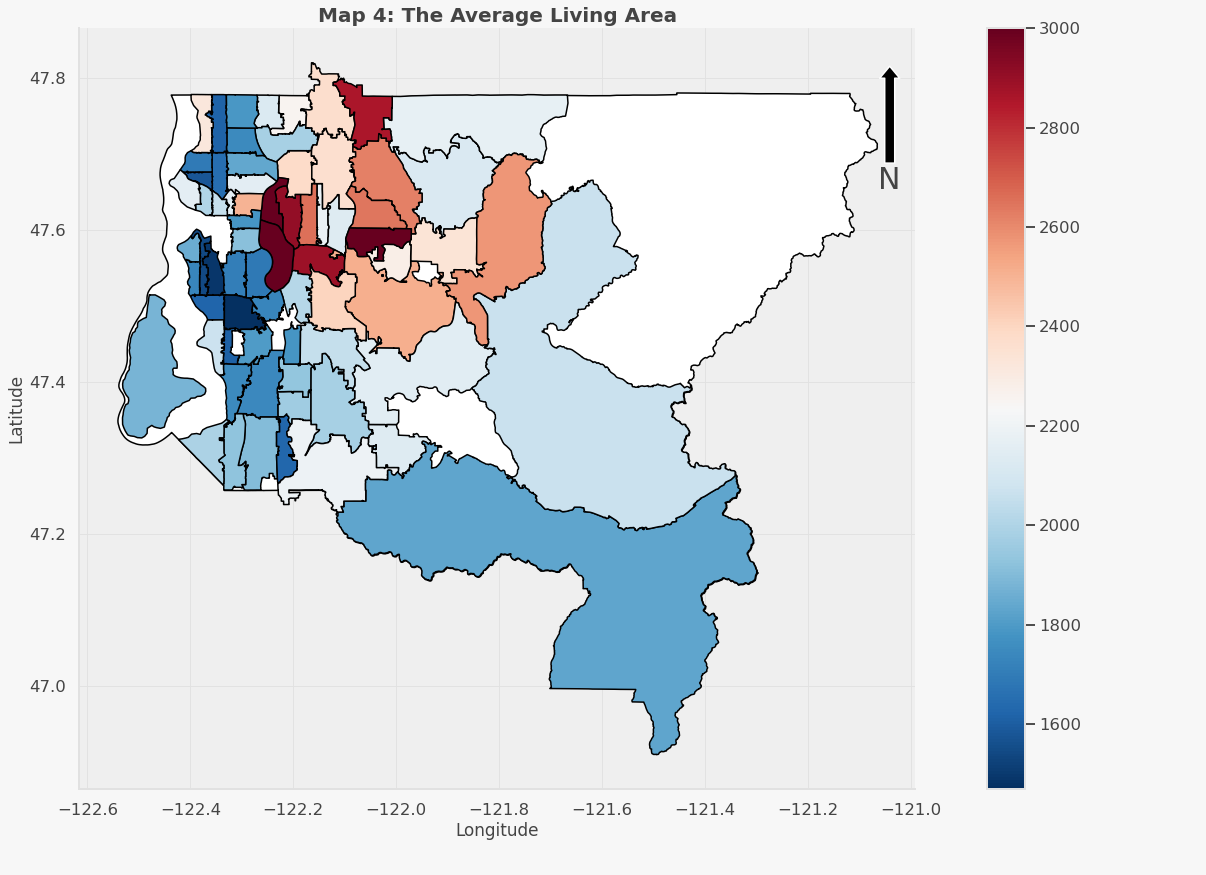

In [35]:
# The map regarding to the third independent variable (the living area)
fig, gax = plt.subplots(figsize = (26,14))
US.query("COUNTYFP == '033' & NAME == 'King'").plot(ax = gax, 
                                                    edgecolor = "black", 
                                                    color = "white",
                                                    alpha = 1)

# Plot the zipcode districts
housesale = gpd.GeoDataFrame(housesale, geometry = 'geometry')
housesale.plot(ax = gax, edgecolor='black', column='sqft_living', 
               legend=True, cmap='RdBu_r',
               vmin=housesale['sqft_living'].min(), vmax=3000)

# Add compass
gax.annotate('N', xy=(0.97, 0.95), xytext=(0.97, 0.80), xycoords=gax.transAxes,
            arrowprops=dict(facecolor='black', width=10, headwidth=20),
            ha='center', va='center', fontsize=30)

# Add description of legends
gax.annotate('The Living Space in Sqft', 
             xy=(0.8, 0.05), 
             xycoords='figure fraction', 
             color = "black", 
             alpha = 0.6,
             size = 15)

gax.set_xlabel("Longitude")
gax.set_ylabel("Latitude")
gax.set_title("Map 4: The Average Living Area", 
              size = 20, fontweight = "bold");

Map 4 shows the average living area(The third independent variable) of each region in King County by Zipcode. Map 4 is a heat map with a range of living spaces from 1468 sqft to 3000 sqft. As can be observed, the northeast region is more red compared with other blue regions, which means the average living area in the northeast is relatively larger than other regions. From map 1, we can tell that houses in **Seattle, Seattle East, Issaquah Plateau and Tahoma-Maple Valley** have a relatively larger living zoom. And houses in **Vashon Island, Federal Way-Auburn and Enumclaw Plateau** have a smaller living area. Comparing the living area and housing price of the same area, we can find that the area with large living area and the area with high housing prices are almost overlapped. This means that in King County, there is a **positive correlation** between the price of a home and the square footage of living space. It is worth mentioning that we found a similar relationship in the scatterplot of project 1.

### Interactive Map

In [36]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer, Spectral8
from bokeh.palettes import brewer
output_notebook()
import json
hs_geojson=GeoJSONDataSource(geojson=housesale.to_json())

Loading BokehJS ...

In [94]:
color_mapper = LinearColorMapper(palette = Spectral8, low = 200000, high = 1000000)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('Zipcode','@ZIP'),('Average Housing Price', '@price'),
                               ('Average Num of Bedrooms','@bedrooms'),
                               ('Average Living Space','@sqft_living')])
p = figure(title="House Price In King County", tools=[hover])
p.patches("xs","ys",source = hs_geojson,
          fill_color = {'field' :'price', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

This is a interactive plot that contains the Zipcode, average housing price, average number of bedrooms and the average living space of the house for each region.

## Project 3

### Brief Description
In this section, as I stated in the future steps in project 2, I will supplement the school information of each district(by zip code) in King County by using web scraping(both `HTML` and `API`) from __Wikipedia__. Recall my main research question: __what are some factors that are greatly related to the housing price__. Here, I am going to explore how this new explanatory variable(schools) is related to the housing price.

The reason why the school information is important is that people's needs for schools are very different, which means their utilities are different. There are some people who don't have children so don't have much need for schools, thus don't need to spend more money on a house for a better school district. But some people may be willing to spend money on a school district house for their children's education. Therefore, exploring the relationship between the __number of schools__ and the __price of housing__ is very helpful for our research question.

## Web Scraping

### HTML Based Scraping
First of all, I will use `HTML-based scraping` to explore the name of every high school in King County, DC from Wikipedia. This sets the stage for the API-based scraping that follows.

In [38]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [39]:
web_url = 'https://en.wikipedia.org/wiki/Category:High_schools_in_King_County,_Washington'
response = requests.get(web_url)
print('Status code\n', response.status_code)

Status code
 200


Here, the website URL that provides all school names in King County is provided, this is a __Wikipedia website__. And we can get the response by using the `requests` package. To check whether the HTTP request has been completed, we need to check whether the status code belongs to the successful responses class(200-299). The output shows that the status code for the response is 200, which means the response is successful and there should be corresponding content of the webpage.

In [40]:
%%capture
soup_object = BeautifulSoup(response.content)
soup_object

For this chunk of code, to make our content looks nicer and more structured, the `BeautifulSoup()` method is applied.

In [41]:
%%capture
data_table = soup_object.find_all('div', 'mw-category mw-category-columns')[0]
data_table
all_values = data_table.find_all('li')

To correctly extract the school names in King County from the webpage, it is important to find the `HTML tag` and `class name` of the webpage. In our webpage, the tag is __'div'__ and the class name is __'mw-category mw-category-columns'__. Moreover, I can now search the web content directly using `find_all()` method. Every row of data in the webpage is enclosed by `<li>` which is the table rows. Therefore, to extract school names from the webpage, we need to find all table rows first.

In [42]:
school_name_df = pd.DataFrame(columns = ['School_Name']) # Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values[:]:
    values = row.find_all('a') # Extract all elements with tag <a>
    # Pick only the text part from the <a> tag
    name = values[0].text
    
    school_name_df.loc[ix] = [name] # Store it in the dataframe as a row
    ix += 1
    
school_name_df.head() # How school name datasets from web scraping looks like

,School_Name
0,Academy of Citizenship and Empowerment
1,Auburn Adventist Academy
2,Auburn High School (Washington)
3,Auburn Mountainview High School
4,Auburn Riverside High School


After identifying the table rows, I create an empty dataset that contains one column to store the school name. Since the information of each table row is similar to each other, I use a `for loop` to access the school names elements which are enclosed in the `<a>` HTML tag. And use `find_all()` method to extract school names since it can return a list of `<a>` tags. Besides, the `.test` attribute can help me to just select school names text from the tag. Now the __school_name_df__ dataset contains the name of all high schools in King County, DC, there are 95 high schools in King County.

This dataset will be used later in the API Based Scraping section, and the aim is to explore more detailed information of schools by using these school names.

### Process Time and Feasibility for HTML Scraping
The process of HTML Based Scraping for generating school names only took less than __10 seconds__, so we don't need to run the program over time to generate the dataset. And the data scraping process is very successful, so we can scrape the data we want for this project. Specifically, I successfully scrape all 95 high school names in King County from the webpage during the HTML Based Scraping.

### API Based Scraping

Scrape the detailed information of all 95 schools in King County by using __Wikipedia API__.

In [43]:
import wptools   # open pages and extract data
import wikipedia
import re # Help to find digits

In [44]:
schools = school_name_df['School_Name'].tolist()
# schools is the list of 95 schools in King County
wiki_data = []

Firstly, convert school names from data frame to list. There is two pieces of information that I need for each school, one is the __zipcode__ for each school, and the other one is __the number of faculties__ in each school. The reason why I choose these two variables is that the zip code can be used to merge with our __House Sale__ dataset, and the number of faculties is a very significant indicator of the quality of the school. Before entering the for loop, I create an empty list _wiki_data_ to store the observations. 

In [45]:
%%capture
for school in schools:
    page = wptools.page(school) # Get the page object
    try: # test errors
        page.get_parse() # Make the page cleaner(corresponding keys and values)
        if page.data['infobox'] != None:
            # If the infobox exist for this school
            infobox = page.data['infobox']
            
            if 'zipcode' in infobox:
                data = {'zipcode': float(infobox['zipcode'])}   
            elif 'state' in infobox and infobox['state'].split(' ')[-1].strip().isnumeric():
                data = {'zipcode': float(infobox['state'].split(' ')[-1].strip())}
            elif 'city' in infobox and infobox['city'].split(' ')[-1].strip().isnumeric():
                data = {'zipcode': float(infobox['city'].split(' ')[-1].strip())}    
            elif 'location' in infobox and infobox['location'].split(' ')[-1].strip().isnumeric():
                data = {'zipcode': float(infobox['location'].split(' ')[-1].strip())}    
            elif 'postcode' in infobox:
                data = {'zipcode': float(infobox['postcode'])} 
            else:
                data = {'zipcode': 0}
                
            if 'faculty' in infobox:
                data['Faculty'] = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", infobox['faculty'])[0])
                        
            elif 'staff' in infobox:
                data['Faculty'] = float(re.findall(r"[-+]?(?:\d*\.\d+|\d+)", infobox['staff'])[0])
            
            else:
                data['Faculty'] = 0
                
        else:
            data = {'zipcode': 0}
            data['Faculty'] = 0
        
        
        data['school_name'] = school
        wiki_data.append(data)
        
    except KeyError: # Helps to handle the error
        pass
        

To scrape the information of all 95 schools in King County, a `for loop` is created to help us scrape and store these data.


In the `for loop`, we want to access all schools from King County, so I loop every school that I scrape previously in the HTML Based Scraping. After that, I want to get the webpage information for each school, so I use the `.page()` method from the `wptools` package to help us create the page object from a Wikipedia article. Moreover, to make the page object cleaner and more readable, I introduce the `get_parse()` method to parse the webpage, and now it contains keys and corresponding values. Now I want to find the detailed school information such as zip code and the number of faculty from the school webpage, this information is stored in the __infobox__ of the webpage. Therefore, I call the __infobox__ to access the information of schools.


And I need to extract the __zipcode__ and the __faculty number__ from the __infobox__. One thing to note in particular is that each school website's infobox stores zipcode and faculty numbers differently. Therefore, by browsing most schools' websites infobox, I concluded that __zipcode__ is generally stored in __five keys__: `zipcode`, `postcode`, `city`, `state`, and `location`. Besides, __faculty number__ is generally stored in __two keys__: `faculty` and `staff`. So I use `if`, `elif` and `else` conditions to extract this information and store them in the _wiki_data_ list. Note that I modify the zipcode and faculty number into `float` type, which helps merge the dataset since the zip code type in our __House Sale__ dataset is `float`. Changing the type of faculty number is to draw the map and histogram better.

Last but not the least, I use `try` and `except` to test the errors and help me handle the error. So I will not be interrupted by one of the webpage scraping errors (except the key error), which will affect the progress. 


In [46]:
wiki_data = pd.DataFrame(wiki_data)
wiki_data.head()

,zipcode,Faculty,school_name
0,98188.0,21.00,Academy of Citizenship and Empowerment
1,98092.0,26.00,Auburn Adventist Academy
2,98002.0,0.00,Auburn High School (Washington)
3,98092.0,73.80,Auburn Mountainview High School
4,98092.0,77.79,Auburn Riverside High School


At last, the dataset that is generated from API Based Scraping is shown above. The dataset contains the school name with their corresponding zip code and the number of faculty of all high schools in King County. Both __zipcode__ and __Faculty__ variable is numerical, and the __school name__ variable is categorical. Although I tried to get information about all schools, some schools miss this information in their infobox. And I will clean these missing values when I merge the __web scraping__ dataset with our __House Sale__ dataset.

### Process Time and Feasibility for API Scraping

The process of API Based Scraping for generating detailed school information took around __90 seconds__, which takes much longer than the previous one(HTML). But it doesn't take one day or one month to run to get the data. And the scraping process is __successful__ since we extract the zip code and the number of faculties for each school in King County. However, this process is __not perfect__, even if I do my best to extract information from the webpage, there are some school web pages where information is still missing. The very challenging part of the scraping process is that each school's infobox keys are different, so I need to look at most of the school's websites to get the patterns and thus the VALUES.

## Map and Graph Summary

### Merging Dataset

In [97]:
%%capture
# Clean the dataset
wiki_data = pd.DataFrame(wiki_data)
index = []
for i in range(0,wiki_data['zipcode'].count()):
    if wiki_data['zipcode'][i] == 0.0:
        index.append(i)
        
wiki_count = wiki_data.drop(index, axis = 0) 
wiki_count = wiki_count.reset_index().drop('index', 1)
wiki_count.head()

In [98]:
%%capture
GBwiki = wiki_count.groupby('zipcode')
school_count = pd.DataFrame(GBwiki.count()).drop('Faculty', 1)
school_count.count()

After cleaning and `groupby` the dataset, we now generate the dataset that records the number of schools in each district by zip code. And I will merge this dataset to our Zipcode shapefile dataset to draw the map and do further analysis.

In [99]:
#%%capture
# Merge data by zipcode
school_count = school_count.merge(housesale, left_on = 'zipcode', right_on = 'ZCTA5CE10', how = 'inner')
school_count.head(3)

,school_name,price,bedrooms,bathrooms,sqft_living,lat,long,ZCTA5CE10,geometry
0,1,280804.690608,3.383978,2.006215,1900.856354,47.309020,-122.270646,98001.0,"POLYGON ((-122.30686 47.28972, -122.30682 47.2..."
1,1,234284.035176,3.326633,1.839196,1627.743719,47.308780,-122.213357,98002.0,"POLYGON ((-122.23252 47.30315, -122.23245 47.3..."
2,3,294111.278571,3.357143,2.047321,1928.882143,47.315741,-122.310054,98003.0,"POLYGON ((-122.34485 47.29670, -122.34359 47.2..."


Now I have the dataset that records the shape of each district(by zip code) and the number of schools in each district. Now it is interesting to draw a __map__ to find the pattern between house prices and the number of schools.

In this part, geographical information regarding the number of schools in each district will be provided. The **main message** of this part is to lookup **how does the number of schools relates to the price of housing in the surrounding area from the map**. Note that the map layer is zip code.

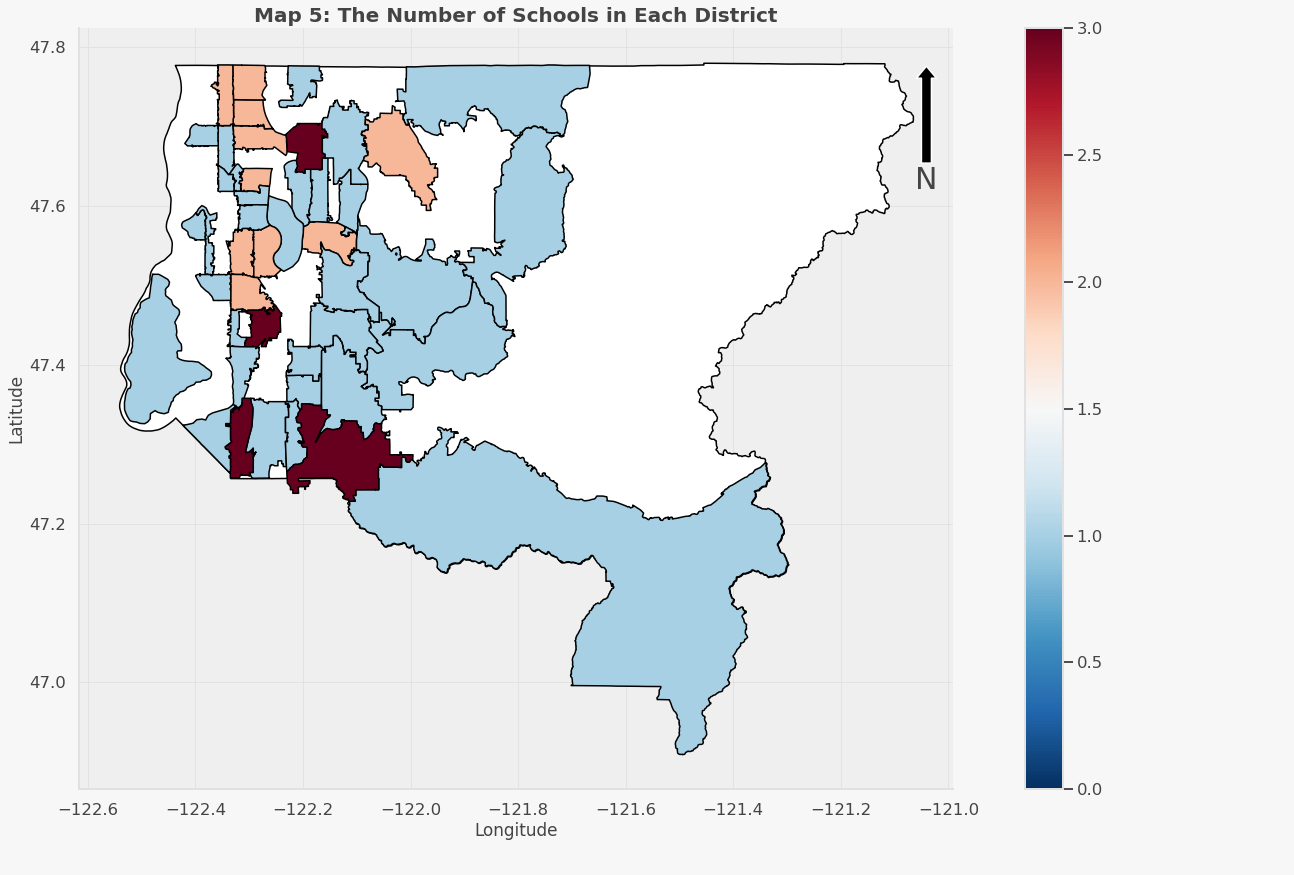

In [50]:
# The map regarding to the number of school in each district
fig, gax = plt.subplots(figsize = (26,14))
US.query("COUNTYFP == '033' & NAME == 'King'").plot(ax = gax, 
                                                    edgecolor = "black", 
                                                    color = "white",
                                                    alpha = 1)

# Plot the zipcode districts
school_count = gpd.GeoDataFrame(school_count, geometry = 'geometry')
school_count.plot(ax = gax, edgecolor='black', column='school_name', 
                  legend=True, cmap='RdBu_r',vmin=0, vmax=3)



# Add compass
gax.annotate('N', xy=(0.97, 0.95), xytext=(0.97, 0.80), xycoords=gax.transAxes,
            arrowprops=dict(facecolor='black', width=10, headwidth=20),
            ha='center', va='center', fontsize=30)

# Add description of legends
gax.annotate('The Range of the Number of School', 
             xy=(0.78, 0.05), 
             xycoords='figure fraction', 
             color = "black", 
             alpha = 0.6,
             size = 15)

gax.set_xlabel("Longitude")
gax.set_ylabel("Latitude")
gax.set_title("Map 5: The Number of Schools in Each District", 
              size = 20, fontweight = "bold");

According to map 5 above, the __number of schools__ in each district is shown in the heat plot above. This heat map has the same colour type as the previous map, the more red means more schools in the area, the more blue means fewer schools in the area. It is easy to observe that the number of schools in the west area is significantly greater than the number of schools in the east area. Looking back at map 1: The Subdivisions of King County, we can conclude that __Seattle, Seattle East and Federal Way-Auburn__ have more schools than other county subdivisions. Therefore, if consumers' utility preference is more inclined to whether there are more school choices, then these county subdivisions should be more recommended. 

Looking back at map 2: The Average Housing Prices in Each District, we can find that the number of schools and the housing price is __not strongly related__, but there are still some connections. In __Seattle__ and __Seattle East__, the housing price and the number of schools is positively related but is negatively related in __Federal Way-Auburn__.

In [51]:
%%capture
# Clean the missing value for the number of faculty
index = []
for i in range(0, wiki_data['Faculty'].count()):
    if wiki_data['Faculty'][i] == 0.0:
        index.append(i)

wiki_mean = wiki_data.drop(index, axis = 0) 

# Clean the outlier
iqr = wiki_mean['Faculty'].quantile(0.75) - wiki_mean['Faculty'].quantile(0.25)
out_range = [wiki_mean['Faculty'].quantile(0.25)-(1.5*iqr), 
             wiki_mean['Faculty'].quantile(0.75) + (1.5*iqr)]

num = []
for y in wiki_mean["Faculty"]:
    if y <= out_range[1] and y >= out_range[0]:
        num.append(y)

clean_f = pd.DataFrame(num, columns = ['Faculty'])
clean_f.head()

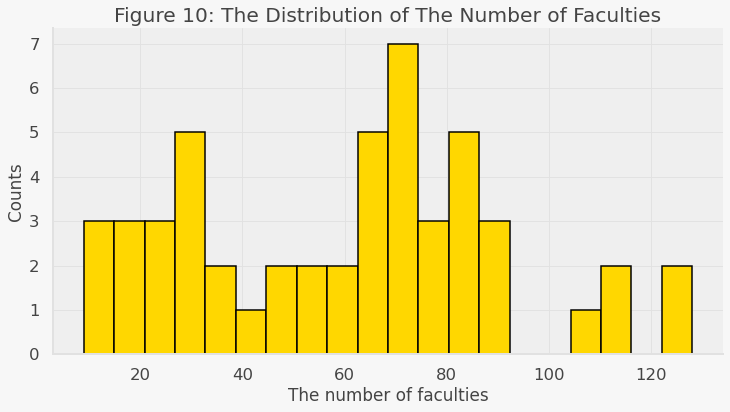

In [53]:
# Plot the histogram of the outcome Y, the price of the house.
bgcolor = (250/255, 250/255, 250/255)
f_hist = clean_f.hist(column = "Faculty",
              grid = True,
              figsize = (12, 6), 
              bins = 20,
              orientation = "vertical",
              color = "gold",
             ec = "black");
plt.title('Figure 10: The Distribution of The Number of Faculties')
plt.xlabel('The number of faculties')
plt.ylabel('Counts');

Figure 10 is a histogram that illustrates the distribution of the number of faculties of each school in King County. After using the __1.5*IQR outlier range__ to filter the outlier, this histogram shows a symmetric and bimodal distribution. And the center value of the number of faculties is around 70 people, most of the schools have 25 to 85 employees. 

In [54]:
%%capture
# Merge datasets of the mean value of the number of faculties and shapefile 
wiki_mean = GBwiki.mean()
wiki_mean = wiki_mean.merge(housesale, left_on = 'zipcode', right_on = 'ZCTA5CE10',
                            how = 'inner')
wiki_mean.head(3)

Now we have the average number of school faculty in each district(by zip code) and the shapefile for each district. Therefore, it is worthwhile to draw a map and explore the pattern for the school faculty. The scale of a school should be proportional to the number of staff at that school, so if a district has __a higher average number of faculty__, it proves that the __school is larger__ in that district.

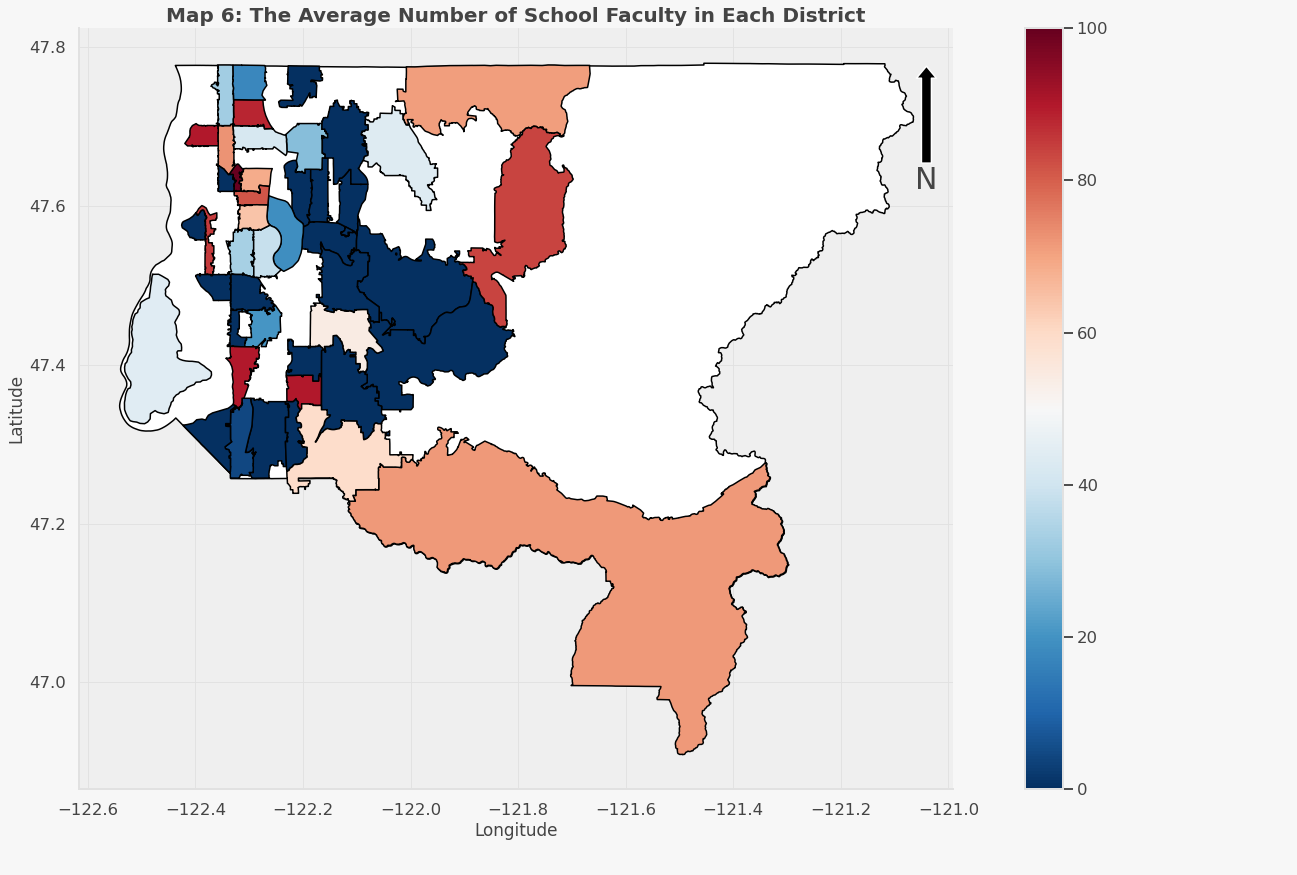

In [55]:
# The map regarding to the number of school in each district
fig, gax = plt.subplots(figsize = (26,14))
US.query("COUNTYFP == '033' & NAME == 'King'").plot(ax = gax, 
                                                    edgecolor = "black", 
                                                    color = "white",
                                                    alpha = 1)

# Plot the zipcode districts
wiki_mean = gpd.GeoDataFrame(wiki_mean, geometry = 'geometry')
wiki_mean.plot(ax = gax, edgecolor='black', column='Faculty', 
                  legend=True, cmap='RdBu_r',vmin=0, vmax=100)



# Add compass
gax.annotate('N', xy=(0.97, 0.95), xytext=(0.97, 0.80), xycoords=gax.transAxes,
            arrowprops=dict(facecolor='black', width=10, headwidth=20),
            ha='center', va='center', fontsize=30)

# Add description of legends
gax.annotate('The Range of the Number of Faculty', 
             xy=(0.78, 0.05), 
             xycoords='figure fraction', 
             color = "black", 
             alpha = 0.6,
             size = 15)

gax.set_xlabel("Longitude")
gax.set_ylabel("Latitude")
gax.set_title("Map 6: The Average Number of School Faculty in Each District", 
              size = 20, fontweight = "bold");

Similarly, map 6 is a heat map that describes the average number of school faculty in each district. And the colour pattern is the same. It is clear from the images that **Seattle**, **Snoqualmie Plateau** and **Enumclaw Plateau** have the highest number of staves. Compared with map2(Price map), there are some connections. In Seattle, the price of the house and the number of school faculty is **positively related**, but this pattern **is reversed** in the other subdivision. For example, the housing price in Enumclaw Plateau is very cheap, but the school size in this region is large.

Therefore, by adding more information about schools, we can help consumers better choose the house they need. Because if consumers don't have a high demand for schools, they can spend their money on other factors such as living areas. This will allow consumers to avoid spending extra money on the school district. It also allows consumers to achieve **utility maximization** within their **budget constraints**.

## Quantitative Analysis

## Linear Regression

In [56]:
# Import packages
import statsmodels.api as sm # ols
from statsmodels.iolib.summary2 import summary_col # table format tool
from linearmodels.iv import IV2SLS
import statsmodels.formula.api as smf
from sklearn import (
    linear_model, metrics, pipeline, model_selection
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate

In [57]:
%%capture
# Import data
df = pd.read_csv(r'/Users/fuwenkai/Documents/U of T/ECO225/ECO225 Project/Data/kc_house_data.csv')
df.head()

In [58]:
warnings.filterwarnings('ignore')
#Data Cleaning
# Change variable type
l = []
for i in df['yr_renovated']:
    if i == 0:
        l.append(0)
    else:
        l.append(1)        
l
df['Renovated'] = l # Change yr_renovated to more informative categorical
df['log_price'] = np.log(df['price'])
df_clean = df.drop(['id', 'date', 'yr_renovated', 'zipcode', ], 1)
df_clean = df_clean.dropna()
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,Renovated,log_price
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,0,12.309982
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,1,13.195614
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,0,12.100712
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,0,13.311329
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,0,13.142166


### Assumptions

For the linear regression models, since we want to put all relevant variables into the model as independent variables, these are multiple linear regressions, where the dependent variable is the price of the house. There are four assumptions for these multiple linear regression model:

> The first assumption is __Linearity__. It means the relationship between independent variables and the dependent variable. Here, we assume there is a linear relationship between the related indicators(see details below) and the housing price.

> The second assumption is __Constant Variance__. This represents that the variance of residual should be constant for all independent variables. 

> The third assumption is __Normality__. For this assumption, we assume the residuals of our model are normally distributed.

> The last assumption is __Independence__. It means the residuals of our model should be independent. Here we assume Harlfoxem collects the data in the right procedure and makes sure the dataset is randomly and independently collected.


### The First Model

Firstly, from the preivious section(project 1, 2 and 3), we select the __number of bedrooms__, __the number of bathrooms__ and __the living area__ as the factors we are interested that will affect the housing price significantly. Now let's use the linear regression model to test whether these factors are important for the housing price. From project 1, we draw the __scatterplot__ and __the regression line__ for each variable and the housing price(see figure 7, 8 and 9). It is clear that these three variables have the positive relationship with the price.

From the economic intuition, when a house has a higher number of bedrooms or bathrooms, the construction costs will rightfully lead to higher housing prices. Similarly, when the living area is higher, the increase in the cost of acreage also leads to an increase in the cost of housing, which leads to an increase in the price of housing. Plus, the first assumption is proved to be true.

In [59]:
# The first regression model

reg1 = smf.ols(formula="log_price ~ bedrooms + bathrooms + sqft_living", data=df_clean).fit()
print(reg1.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     6949.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:48:25   Log-Likelihood:                -9511.5
No. Observations:               21613   AIC:                         1.903e+04
Df Residuals:                   21609   BIC:                         1.906e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2923      0.010   1219.833      

In [60]:
y=df["log_price"]
y_pred = reg1.predict(df_clean,1)
mse1 = metrics.mean_squared_error(y, y_pred)
print('The mean squared error is', mse1)

The mean squared error is 0.14118109705715454


From the OLS regression results above we can now indicates the multiple linear model is:
$$\hat{logprice} = \beta_0
+\beta_1x_{bed}+\beta_2x_{bath}+\beta_3x_{livarea}$$

* $\beta_0$ = 12.2923 is the y-intercept of the regression model, it means when all variables equal 0, the log housing price should be 12.2923 dollars.
* $\beta_1$ = -0.0541, it is the estimated coefficient of the number of bedrooms, it denotes that a one unit increase in the number of bedrooms will decrease the percentage of price by 0.0541.
* $\beta_2$ = 0.0536, this is the estimated coefficent of the number of bathrooms, it means that if there is one unit increase in the number bathrooms, the percentage of price will increase by 0.0536.
* $\beta_3$ = 0.0004, similarly, this is the estimated coefficient of the living area, it means that a one unit increase in the living area will cause the percentage of price of house to increase 0.0004.

Plus, these three variables are significant for the model since the p-values for all variables are less than the threshold __0.05__.  However, this model also has the disadvantage, the model does not describe the **true value** very well. We can react to the parts of the dataset that can be interpreted by this model by looking at the *$AdjR^2$*, the *$AdjR^2$* of the model is only **0.491**, which means the dataset cannot be well described by the model. Besides, the MSE of model one is 0.14118, which is relatively large. The MSE of all models will be explained and compared in the model comparison section.

Besides, the **mean squared error** can be seperated to two parts, the __variance__ of the estimator($\hat{Y}$), and the __square of the bias__($[\hat{Y} - Y]^2$). The variance describes 

To solve this problem, we need to find more variables from the dataset that have a linear trend with the dependent variable. The second model following will include all variables that have a linear trend with y.


### The Second Model

Now we need to include more variables model, let's first list all additional variables that has linear trend with the housing price:

**Numerical Variables**:

`The square footage of the land space`, `The view of the property(index)`, `The condition of the property(index)`, `The grade of the house`, `The square footage of the interior housing space above the ground level`, `The square footage of the house below the ground level`, `The year of construction`, `The latitude and longitude`, `The sqft of living space for the nearest 15 neighbours`, `The sqft of land area for the nearest 15 neighbours`

**Dummy(Categorical) Variables**:

`Whether the house is renovated`: This dummy variable contains 0(the house is not renovated) and 1(the house is renovated). And the base level is 0.

`Whether you can see the water`: This dummy variable contains 0(the apartment was not overlooking the waterfront) and 1(the apartment was overlooking the waterfront).

For __numerical variables__, it is straighforward to see that the variables related to the areas of the house has a linear trend with the housing price. So the variables that is related to the areas such as land area and basement area can be put into the linear regression. Secondly, the view of the property means how good the view of the property was. Then it comes to the cost of the location, when the better the view means the higher the cost of the location, the price of the house should also be higher. So it is reasonable to put `the view of the property` and `The latitude and longtitude` into the regression model. Moreover, the condition and the newness of the house can also be closely related to the price. Normally, keeping other variables constant, consumers will prefer newer and nicer houses, so the demand of newer and nicer houses will be higher than older and worse houses, so according to microeconomic prices should also be higher. Therefore, we can put `The condition of the property`, `The year of construction` and `The grade of the property` into model as well.

For __dummy variables__, whether the house is renovated reflects the newness of the house to a large extent. As explained above, we can add this dummy variable into the model as well. Besides, the waterfront variable shows the advantage of location, as above, we can obtain the waterfront variable into the model.

In [61]:
# The second regression model
reg2 = smf.ols(formula="log_price ~ bedrooms + bathrooms + sqft_living + \
sqft_lot + floors + C(waterfront) + view +condition+grade+\
sqft_above +sqft_basement+yr_built+lat+long + sqft_living15 + \
sqft_lot15 + C(Renovated)", data=df_clean).fit()

print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4464.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:48:30   Log-Likelihood:                -1028.7
No. Observations:               21613   AIC:                             2091.
Df Residuals:                   21596   BIC:                             2227.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -53.3573      1

In [62]:
y=df["log_price"]
y_pred = reg2.predict(df_clean,1)
mse2 = metrics.mean_squared_error(y, y_pred)
print('The mean squared error is', mse2)

The mean squared error is 0.06439715644903951


The second regression model contains more variable compared with the first one. From the OLS regression results, we can see that the *$AdjR^2$* of the second model is __0.768__, which is larger than the first model(0.491). This means that the second regression model can explain the dataset much better than the first one.

However, the second model has two big problems. The first one is that there are some similar variables in the model such as the land area and the living area. This will lead to multicollinearity problem. If the multicollinearity is large, then it means the correlation between predictors is high. And it will lead to a high variance of the estimates, which makes the estimates insignificant. The second problem is that there are too many variables in the model, which will lead to high variance and overfitting. Therefore, it is necessary to drop some variables that shows similar trend.


To prevent this problem, since we have the living area of the house, we can then remove the `land area`, the `area above and below the ground` because these information are already captured by the living area. Similarly, the `land area of the nearest 15 neighbours` can be dropped because the living area of the nearest 15 neighbours include the similar information. Besides, `The condition of the house` can also be removed, as the house's grade obviously reflects the condition of the house. Last but not the least, the number of bedrooms and the number of bathrooms have a very similar trend, so we can drop `The number of bedrooms` to avoid multilinearity problem.

In the following third regression model, these excess variables will be dropped, and we will compare the second and the third model.

### The Third Model

In [63]:
# The third regression
reg3 = smf.ols(formula="log_price ~ bathrooms+sqft_living+floors+C(waterfront)+grade+\
yr_built+lat+long+sqft_living15+C(Renovated)", data=df_clean).fit()

print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     6674.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:48:33   Log-Likelihood:                -1589.3
No. Observations:               21613   AIC:                             3201.
Df Residuals:                   21602   BIC:                             3288.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -51.4552      1

In [64]:
y=df["log_price"]
y_pred = reg3.predict(df_clean,1)
mse3 = metrics.mean_squared_error(y, y_pred)
print('The mean squared error is', mse3)

The mean squared error is 0.06782623572515868


The OLS of the third regression model is shown above. Compared with the *$AdjR^2$*(0.768) of the second regression model, the *$AdjR^2$* of the third regression model is __0.755__. The *$AdjR^2$* of the third model is slightly smaller than the *$AdjR^2$* of the second model, this acceptable since there is a __trade-off__ between the *$AdjR^2$* and the multicollinearity. 

This is the model that works **better** than the first and the second model for the given dataset, from the OLS results, we can generate the model:
$$\hat{logprice} = \beta_0+\beta_1x_{water|yes}+\beta_2x_{renovated|yes}+\beta_3x_{livarea} + \beta_4x_{floor}+\beta_5x_{grade}+\beta_6x_{year} + +\beta_7x_{lat}+\beta_8x_{long} + +\beta_9x_{livarea15} $$

**Interpretations for $\beta_i, \{i \in 0,1,2,3...9\}$**:

> For i = 0: The intercept of the regression model, when all variables are zero, the value of the log housing price.

> For i = 1,2: The coefficient before the dummy variable, which indicate when all the other variables holding, the average difference of the percentage of housing price between the base level and level one is $\beta_i$. Specifically, the percentage of housing price of the house that was overlooking the waterfront is 0.5711 higher than the house that was not. Similarly, the percentage of housing price of the house that was renovated is 0.0474 higher than the house that was not.

> For i = 3,4,5...9: The coefficient before the numerical variable, which indicate when all the other variables holding, one unit increase in the corresponding x_i will cause $\beta_i$ increase in the percentage of the housing price.

From the coefficients, it is obvious that only the construction year and the longitude of the house is negatively related to the price of the house. This means that __old houses__ can fetch a __better price__, and the __more north__ the house price will be __lower__. The remaining variables are all positively correlated with the housing price.

Moreover, from the OLS results, we can see that **the grade of the house**($\beta_i = 0.1667$), **the latitude of the house**($\beta_i = 1.3155$) and **whether the house is a water view house**($\beta_i = 0.5711$) have a relative large coefficient compare with other variables. This means that the impact of these three variables on the price of housing is relatively large. In addition, the MSE of the model is **0.067826**, which is relatively low and represents the model is **unbiased**.

Recall the main research question of the analysis: __what are some factors that greatly correlate with the price of housing__. From the results of the third model, we can answer the research question from a quantitative perspective using the OLS linear regression model. **The grade and latitude of the house** and **whether the house is water view** are factors that greatly correlate with the price of housing.

### The Fourth Model
After that, it is interesting and useful to explore whether the trend will be different for different level of houses. To interpret that, the following models will contain the same variables as model 3, but divided into two price ranges (high and low priced homes).

In [65]:
# Divide houses into two subgroups, high price and low price
df_highp = df_clean.drop(df_clean[df_clean.price > df_clean.price.mean()].index)
df_lowp = df_clean.drop(df_clean[df_clean.price <= df_clean.price.mean()].index)

In [66]:
reg4 = smf.ols(formula="log_price ~ bathrooms+sqft_living+floors+C(waterfront)+grade+\
yr_built+lat+long+sqft_living15+C(Renovated)", data=df_highp).fit()

print(reg4.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     1663.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:48:36   Log-Likelihood:                 1788.3
No. Observations:               13694   AIC:                            -3555.
Df Residuals:                   13683   BIC:                            -3472.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -23.8881      1

In [67]:
y=df["log_price"]
y_pred = reg4.predict(df_clean,1)
mse4 = metrics.mean_squared_error(y, y_pred)
print('The mean squared error is', mse4)

The mean squared error is 0.09922881294845916


Regression model 4 above explains the factors of high-priced houses. From the results we can observe that four variables are highly correlate with the housing price. `Whether the house is water view`($\beta_i = 0.3849$), `The grade of the house`($\beta_i = 0.1138$), `The latitude`($\beta_i = 1.1345$) and `The Longitude`($\beta_i = 0.1200$). All these four indicators are positively related to the housing price. Also, the variable `Whether the house is renovated` has the corresponding p-value of __0.054__, which is larger than the threshold 0.05. Therefore, whether the house is renovated is not that important for the price of high-priced houses. This model is unbiased since the MSE is very small.

### The Fifth Model

In [68]:
reg5 = smf.ols(formula="log_price ~ bathrooms+sqft_living+floors+C(waterfront)+grade+\
yr_built+lat+long+sqft_living15+C(Renovated)", data=df_lowp).fit()

print(reg5.summary())



                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:48:38   Log-Likelihood:                 914.18
No. Observations:                7919   AIC:                            -1806.
Df Residuals:                    7908   BIC:                            -1730.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -70.1823      3

In [69]:
y=df["log_price"]
y_pred = reg5.predict(df_clean,1)
mse5 = metrics.mean_squared_error(y, y_pred)
print('The mean squared error is', mse5)

The mean squared error is 0.19385063566379454


Regression model 5 above illustrates how low-priced houses factors relate to the housing price. From the results above, there are four factors that are highly correlated with the price of the house. `Whether the house is water view`($\beta_i = 0.4729$), `The grade of the house`($\beta_i = 0.1117$), `The latitude`($\beta_i = 0.4178$) and `The longitude`($\beta_i = -0.5474$). Except for the longitude of the house, the other three factors are positively correlated with the price of the house. The negative coefficient of the longitude means that if the house is more south, the price of the house will be lower. Plus, this model is slightly biased sicne the MSE is relatively large.

In [70]:
# Generate the compare table
data = [['water view houses', 0.3849, 0.4729],
       ['The grade of the house', 0.1138, 0.1117],
       ['The latitude', 1.1345, 0.4178],
       ['The longitude', 0.1200, -0.5474]]

col_name = ["Factors", "Coef. for high-priced houses", "Coef. for low-priced houses"]

print(tabulate(data, headers = col_name, tablefmt = "fancy_grid"))

╒════════════════════════╤════════════════════════════════╤═══════════════════════════════╕
│ Factors                │   Coef. for high-priced houses │   Coef. for low-priced houses │
╞════════════════════════╪════════════════════════════════╪═══════════════════════════════╡
│ water view houses      │                         0.3849 │                        0.4729 │
├────────────────────────┼────────────────────────────────┼───────────────────────────────┤
│ The grade of the house │                         0.1138 │                        0.1117 │
├────────────────────────┼────────────────────────────────┼───────────────────────────────┤
│ The latitude           │                         1.1345 │                        0.4178 │
├────────────────────────┼────────────────────────────────┼───────────────────────────────┤
│ The longitude          │                         0.12   │                       -0.5474 │
╘════════════════════════╧════════════════════════════════╧═════════════════════

Comparing the two models(model 4 and 5) for high-priced and low-priced houses, we can find that the factors that are closely related to the house price are the same, but the corresponding coefficients are different (see the table above). Specifically, the longitude for two types of houses witness a different trend. Higher priced homes get more expensive the further north you go, while lower priced homes get more expensive the further south you go. Moreover, high-priced houses are more sensitive to latitude, as a one unit increase in latitude results in a 1.1345 increase in the percentage of price of a high-priced house, while the percentage increase in the price of a low-priced house is only 0.4178. The other two factors have roughly the same effect on houses at different price level houses.

### Model Comparison

In [71]:
# Store MSE
dic = {reg1: mse1, reg2: mse2, reg3: mse3,reg4: mse4,reg5: mse5}

# Creat info_dict
from statsmodels.iolib.summary2 import summary_col
info_dict={'MSE' : lambda x: f"{dic[x]:.4f}", 
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

In [72]:
results_table = summary_col(results=[reg1,reg2,reg3,reg4,reg5],
                            float_format='%0.4f', # two decimal
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                        'Model 4',
                                        'Model 5'],
                            info_dict=info_dict,
                            regressor_order=['bedrooms',
                                            'bathrooms',
                                            'sqft_living'])

print(results_table)


                    Model 1     Model 2     Model 3     Model 4     Model 5  
-----------------------------------------------------------------------------
bedrooms           -0.0541*** -0.0104***                                     
                   (0.0034)   (0.0024)                                       
bathrooms          0.0536***  0.0703***   0.0785***   0.0610***   0.0389***  
                   (0.0051)   (0.0041)    (0.0040)    (0.0045)    (0.0050)   
sqft_living        0.0004***  0.0001***   0.0001***   0.0001***   0.0001***  
                   (0.0000)   (0.0000)    (0.0000)    (0.0000)    (0.0000)   
C(Renovated)[T.1]             0.0762***   0.0474***   0.0216*     0.0516***  
                              (0.0092)    (0.0093)    (0.0112)    (0.0105)   
C(waterfront)[T.1]            0.3766***   0.5711***   0.3849***   0.4729***  
                              (0.0219)    (0.0207)    (0.0490)    (0.0185)   
view                          0.0566***                        

The above table records the coefficient of variables and several important indices of five models that we generate previously. Recall briefly that the dependent variable of all models is log price, and the independent variables in model 1 are the number of bedrooms, the number of bathrooms and the living area. The independent variables in model 2 are all variables that have a linear relationship with price, and the independent variables in model 3 are the variables of model 2 after filtering the similarity. Lastly, The independent variables in model 4 and model 5 are the same as those in model 3, and they explain the factors of high and low priced houses, respectively.

Based on the previous analysis, **model 3** is clearly the most ideal linear model, and I will further argue this through several metrics that are important in the model. The first important indicies is the *$AdjR^2$*, it represents the proportion of variance that can be explained by the model. If $AdjR^2$ is **closer to 1**, that means RSS is small compared to TSS, and the linear regression model can predict the outcome accurately.

Besides, the **mean squared error** is another important index, it can be seperated to two parts, the __variance__ of the estimator($\hat{Y}$), and the __square of the bias__($[\hat{Y} - Y]^2$). The variance describes how much variation the estimator is, and the bias shows the average distance from the truth to the prediction. A good model should have small bias or small variance, which means MSE should be **smaller**.

The $R^2$, $AdjR^2$ and MSE of each model are clearly marked in the table, the $AdjR^2$ of the second model is the highest, which is 0.7677. This means that this model can explain the largest part of the truth. But according to the multicollinearity problem mentioned before, there are similar variables in this regression model. The $AdjR^2$ of model 3 is 0.7554, which is slightly smaller than the second but avoids the multicollinearity problem. Therefore, there is a trade-off, and that is the reason why we choose the third model.

Moreover, the MSE of the second model is 0.0644, which is the smallest. And the MSE of the third model is 0.0678, which is slightly larger than the second one. Similarly, there is a trade-off between multicollinearity and MSE, and that's the reason why we choose the third model. Therfore, the third model is the best one among these five models. 




## Machine Learning

In [73]:
# Import packages
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

For the machine learning part, the Random Forest will be used to predict the predictors. The reason why we use Random Forest instead of a regression tree is that the regression tree predict outcomes based on a set of simple binary decisions, which has high variance and the splits depend on the dataset a lot. So the predictive performance is not that great.

In [74]:
# Define X and Y
X = df_clean.drop(["price", "log_price"], axis = 1).copy()

for col in list(X):
    X[col] = X[col].astype(float)

y = df_clean["log_price"]

For the Random Forest, the independent variables are all variables that is related to the outcome in the cleaned dataset(same with the model 2). And the outcome is the log price of houses.

The **mechanism** of the Random Forest is that: 
1. Randomly draw samples(observations) from the original data, total draw B times, where B is the number of regression trees.

2. For each samples that is drawn from the first step, run a regression tree for that sample but only randomly choose M (not all predictors) predictors. $M \leq P$, P is the total number of variables in the dataset, which is 17 for our dataset.

3. Now we have B random regression trees(using M predictors), then make prediction for all trees.

4. Lastly, take the average value of all predictions from each regression tree, and that is the new prediction for the Random Forest.

**Note**: The Random Forest usually perform the best when M approximately equals to P/3.

In [75]:
# Generate the Random Forest
regr1 = RandomForestRegressor(max_features=6, random_state=1)

By using `RandomForestRegressor` from `sklearn` package, we can perform the Random Forest for our dataset. There are two **parameters** for the Random Forest function, the max number of features and randomness. In fact, the maximum number of features is **M** from mechanism above, and the random_state = 1 ensures that M predictors are randomly selected from P. 

As is stated above, the best M is approximately equals to P/3, if we increase the number of M, there are too many leaves, thus the Random Forest will be overfitting and will lead to high variance. If we decrease the number of M, the bias will be large. Since P is **17** for our dataset, **6** is selected as M. 

The **advantage** of using only some of the predictors(M) in each step is that weaker predictors also have a chance to perform. If we don't select predictors, then most splits will be along the predictor that has strong relationship to the outcome(price). Therefore, these weaker predictors will also be used to grow trees. Secondly, Compared with bagging, this Random Forest method has more independence since only a subset of predictors is allowed for each tree.

In [77]:
regr1.fit(X,y)
pred = regr1.predict(X) # Make prediction

mse_r = mean_squared_error(y, pred) # Calculate MSE

r2 = regr1.score(X, y) # Calculate R2
print('The mean squared error is:', mse_r)
print('The R-squared is:', r2)

The mean squared error is: 0.005009642400100725
The R-squared is: 0.9819396686417083


After building the Random Forest, the `predict` function is used to make prediction. To test whether the prediction is good, calculating the MSE and $R^2$ for the prediction is necessary. These two metrics have been introduced in the LINEAR REGRESSION section, the closer the R2 is to 1 the better and the smaller the MSE the better. As is stated, the MSE for Random Forest is __0.0050096__, which is really close to 0, and it shows that the estimator is **unbiased**. Besides, the $R^2$ for Random Forest is __0.98194__, which means that the dataset can be well explained by the model.

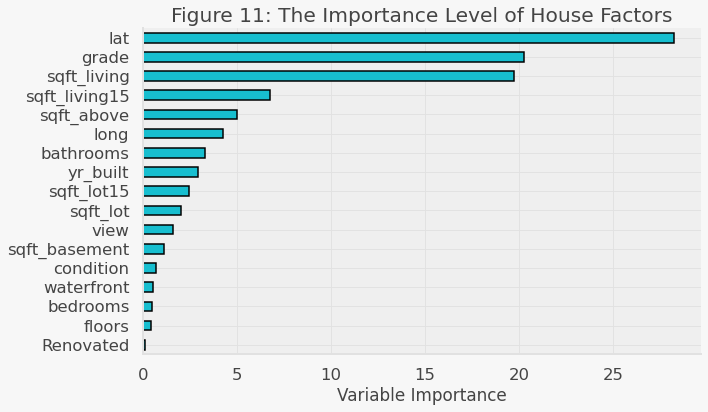

In [78]:
# Plot the importance level
Importance = pd.DataFrame({'Importance':regr1.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh',
                                                                  color='tab:cyan',
                                                                  ec = 'black',
                                                                  figsize = (10,6))

plt.title("Figure 11: The Importance Level of House Factors")
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

To visualize the Random Forest, figure 11 above shows the importance level of house factors relative to the housing price. It is obvious that **latitude** is the most important factor for the housing price. Furthermore, **The grade of the house** and **The living area** are also much more important than the other variables. Surprisingly, `whether the house is renovated and water view` are not important in the Random Forest model.

### Comparison of Machine Learning and Linear Regression

In [95]:
# Generate comparison table
data = [['Model 1',reg1.rsquared, mse1],
       ['Model 2', reg2.rsquared, mse2],
       ['Model 3(***)', reg3.rsquared, mse3],
       ['Model 4', reg4.rsquared, mse4],
       ['Model 5', reg5.rsquared, mse5],
       ['Random Forest', r2, mse_r]]

col_name = ['Model', 'R-squared', 'Mean Square Error']

print(tabulate(data, headers = col_name, tablefmt = "fancy_grid"))

╒═══════════════╤═════════════╤═════════════════════╕
│ Model         │   R-squared │   Mean Square Error │
╞═══════════════╪═════════════╪═════════════════════╡
│ Model 1       │    0.491026 │          0.141181   │
├───────────────┼─────────────┼─────────────────────┤
│ Model 2       │    0.767841 │          0.0643972  │
├───────────────┼─────────────┼─────────────────────┤
│ Model 3(***)  │    0.755479 │          0.0678262  │
├───────────────┼─────────────┼─────────────────────┤
│ Model 4       │    0.548596 │          0.0992288  │
├───────────────┼─────────────┼─────────────────────┤
│ Model 5       │    0.620946 │          0.193851   │
├───────────────┼─────────────┼─────────────────────┤
│ Random Forest │    0.98194  │          0.00500964 │
╘═══════════════╧═════════════╧═════════════════════╛


The table above compares the important metrics of linear regression models and the machine learning model. **Model 3** is the best model for linear regression. But when comparing model 3 with Random Forest, the predictive performance of model 3 is dwarfed. The $R^2$ of Random Forest is **0.98194**, which is really close to 1, and this means that Random Forest can almost completely explain the truth. Besides, the MSE of Random Forest is extremely low as well, with around 0.0050096. This means that the prediction is very accurate and the model is unbiased.

Moreover, Random Forest can put all variables into the model and get the results. But if we use linear regression model, this is not practical because we will face the problem of multicolliearity. Plus, not all variables are perfectly linear with outcome. For example, the price may tend to increase exponentially with the the number of bedrooms of the house, which requires constant adjustment of the linear regression to determine the best relationship between the two.

Of course, there are similarities between the prediction of Random Forest and linear regression. In model 3, the **latitude**, the **grade** and **whether it is a water view house** will dramatically affect the price of the house. In the Random Forest model, the price of a house is closely related to the **latitude**, the **grade**, and the **living area**. What can be found is that the results analyzed by the two models are mostly the same, but there are still some discrepancies.

# Conclusion
In conclusion, for project 1, the dataset that supports the analysis is published by Harlfoxem on the Kaggle website in 2017. The purpose of this part of the analysis is to examine the factors that correlate with the price of the house statistically, so it can help consumers maximize their utilities within their budget constraints. 

For project 2, datasets that help the analysis are the house sale dataset and shapefiles of US counties, King County subdivisions and Zip code. And the goal for this part is to develop the relationship between the housing price and house factors geographically. I compare the heat map of the housing price with the heat map of the number of bedrooms and the living area based on the same region by King County subdivisions. The result is that the number of bedrooms and living area both trend positively with the price of the house on the map.

In project 3, `HTML` and `API` Based Scraping is used to generate the **zipcode** and the **number of faculty** of each school in King County. Geographically, the relationship between the **number of schools** around the house and the **housing price** is positive, but not strong. Besides, the relationship between **school size** and neighbourhood __housing prices__ shows different trends in different areas. So we can't say that the two are positively correlated.

In final project, the linear regression model and machine learning is applied to the dataset House Sale in King County. The linear regression model tells that factors **the latitude and the grade of the house** and **whether the house is water view** are highly correlated with the price of the house. And the Random Forest shows that **the latitude, the grade and the living area of the house** is closely related to the housing price.

To answer the research question and to test the hypothesis analyzed in this project. The __scatterplot__, the __regression line__, the __heat maps__, the __linear regression model__ and **machine learning** are the main methods to explore the research question. It is clear that the first and second part of the hypothesis is correct since machine learning tells us the living area is closely related to the housing price, and the living area is positively related to the housing price on the map. Moreover, the third part of the hypothesis we made is only half correct since the school and the price are not strongly correlated.

# Drawbacks and Future Steps
Inevitably, this analysis also has its drawbacks. First of all, the dataset was recorded only for the housing information in King County, USA, which led to some randomness in the results of the analysis. And it is unable to predict the factors that affect the housing price in other provinces or countries around the world. Second, since we have not yet learned model selection, we cannot include more variables at this time. Besides, when I merge the dataset in project 2, several Zipcodes does not match each other due to the dataset bias. And in project 3, some school webpage in Wikipedia do not contain the information we need, so we lose some data. In the map, this drawback is magnified.

In the future, for project 1, I will look for similar data sets from more regions to do my analysis, preferably from regions around the world, which makes my analysis representative and reliable. Moreover, I will include more explanatory variables, and do the model selection to select the variables that affect the housing price the most. For project 2, I will add more external datasets that contain geographical information such as the number of schools in each region. For project 3, I will try to use other API methods to get the missing information about schools, which will make our maps look more convincing and make our analysis more accurate. And I may scrape schools in other areas so that I can make my sample size larger and thus make my analysis more representative.

# Bibliography
1. Kaggle.com. 2022. House Sales in King County, USA. [online] Available at: <https://www.kaggle.com/harlfoxem/housesalesprediction> [Accessed 6 February 2022].
2. pagebreak in markdown while creating pdf. (2022). Retrieved 6 February 2022, from https://stackoverflow.com/questions/22601053/pagebreak-in-markdown-while-creating-pdf
3. Seppänen, J. (2022). How do you change the size of figures drawn with Matplotlib?. Retrieved 6 February 2022, from https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
4. plot, M. (2022). Matplotlib: avoiding overlapping datapoints in a "scatter/dot/beeswarm" plot. Retrieved 5 March 2022, from https://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot/46802300#46802300
5. (2022). Retrieved 5 March 2022, from https://opendata.arcgis.com/datasets/e6c555c6ae7542b2bdec92485892b6e6_113.geojson
6. Census.gov. (2022). Retrieved 5 March 2022, from https://www.census.gov/
7. Category:High schools in King County, Washington - Wikipedia. (2022). Retrieved 27 March 2022, from https://en.wikipedia.org/wiki/Category:High_schools_in_King_County,_Washington
8. Algieri, B. (2013). House price determinants: Fundamentals and underlying factors. Comparative Economic Studies, 55(2), 315-341.